<a href="https://colab.research.google.com/github/A-R-I-N-D-A-M/intermediate/blob/master/Multiple_time_series_using_FB_Prophet_and_Apache_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [53.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/

In [ ]:
!apt-get install -y openjdk-8-jdk-headless -qq > /dev/null 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"  
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode


In [ ]:
!pip install pyspark

     |████████████████████████████████| 212.3MB 71kB/s 
     |████████████████████████████████| 204kB 44.9MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=590d7146df5998588c28acc687299b6f1482ddf4a233f1f39a5b3d346eeae0e7
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd

from fbprophet import Prophet

matplotlib.rcParams['figure.figsize'] = (10, 8)
matplotlib.rcParams['axes.grid'] = False

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/tempareture.csv')
df

Region  Country  State     City  Month  Day  Year  AvgTemperature
0             Africa  Algeria    NaN  Algiers      1    1  1995            64.2
1             Africa  Algeria    NaN  Algiers      1    2  1995            49.4
2             Africa  Algeria    NaN  Algiers      1    3  1995            48.8
3             Africa  Algeria    NaN  Algiers      1    4  1995            46.4
4             Africa  Algeria    NaN  Algiers      1    5  1995            47.9
...              ...      ...    ...      ...    ...  ...   ...             ...
1048153  Middle East     Oman    NaN   Muscat      2    7  1999           -99.0
1048154  Middle East     Oman    NaN   Muscat      2    8  1999           -99.0
1048155  Middle East     Oman    NaN   Muscat      2    9  1999           -99.0
1048156  Middle East     Oman    NaN   Muscat      2   10  1999           -99.0
1048157  Middle East     Oman    NaN   Muscat      2   11  1999           -99.0

[1048158 rows x 8 columns]

In [ ]:
df['date']=pd.to_datetime(df[['Year', 'Month', 'Day']])

In [ ]:
df=df[['date','City','AvgTemperature']]

In [ ]:
df.set_index('date').groupby('City').plot()

In [ ]:
noise_data=df[df['AvgTemperature']==-99.0].index

In [ ]:
df.drop(noise_data,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this w

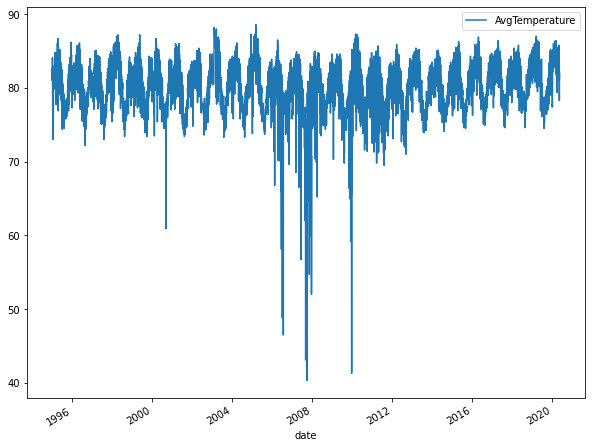

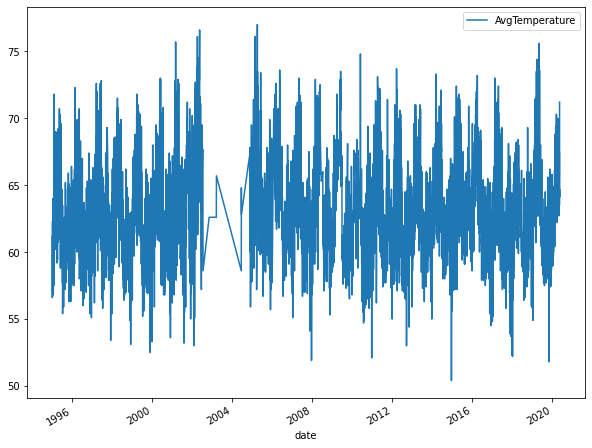

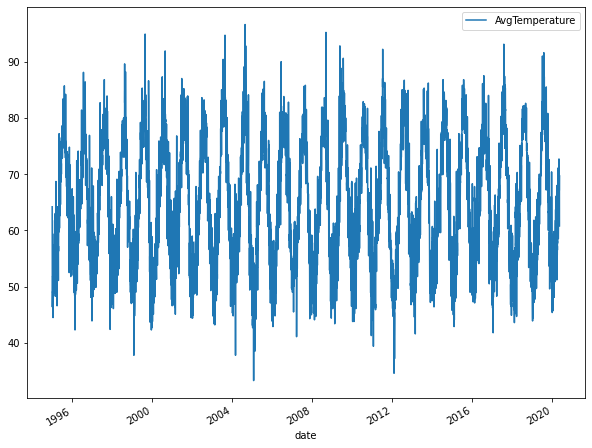

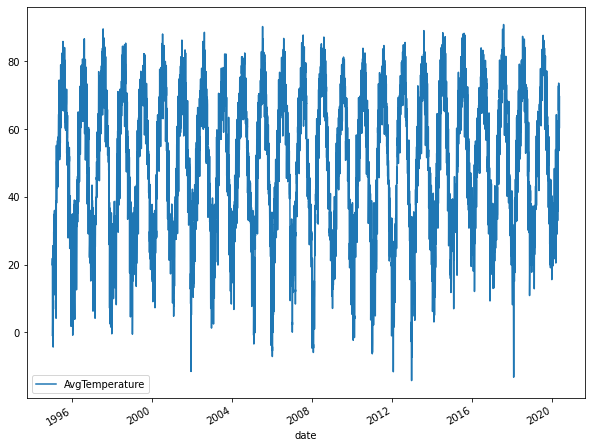

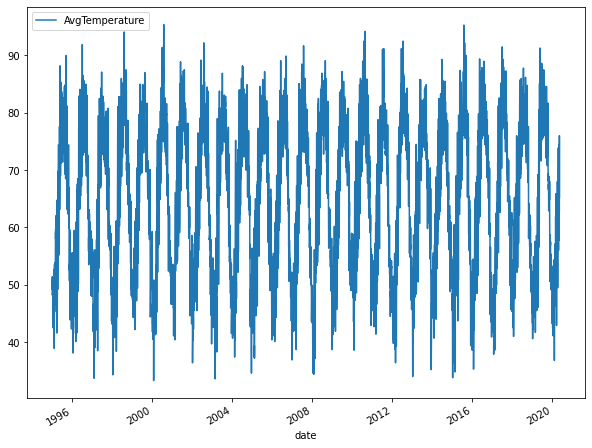

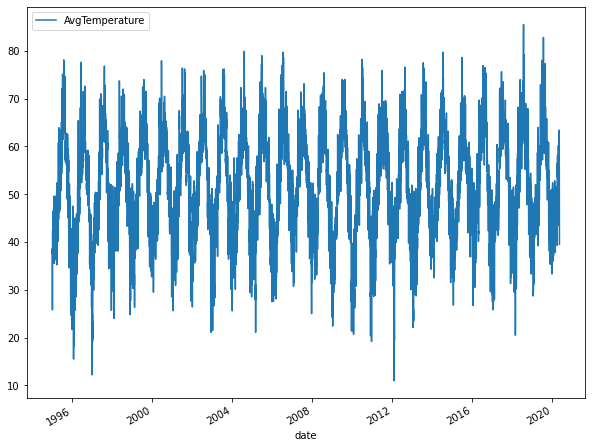

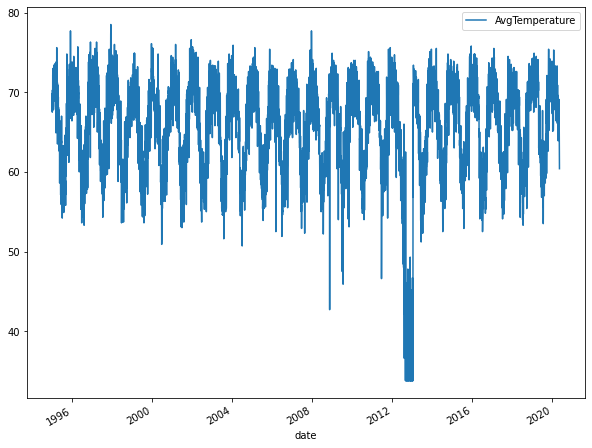

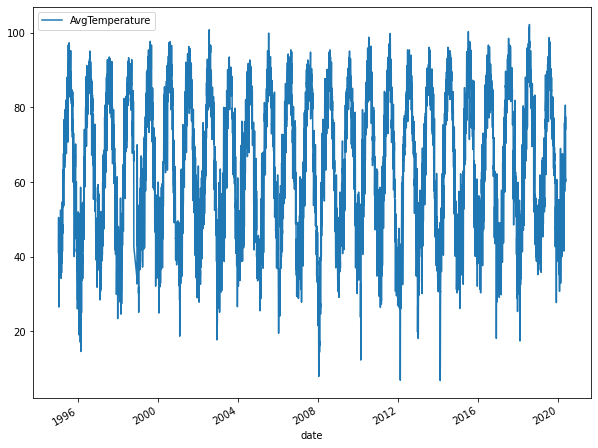

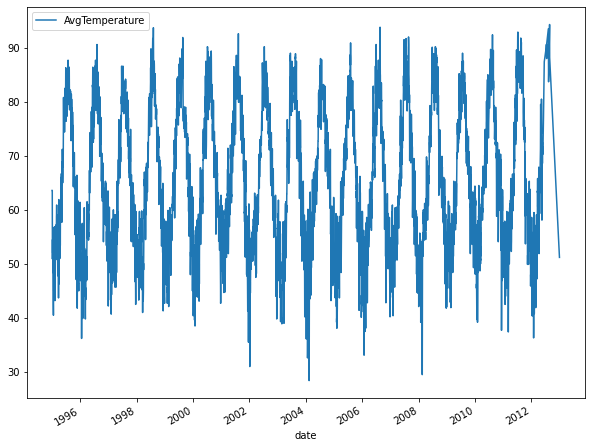

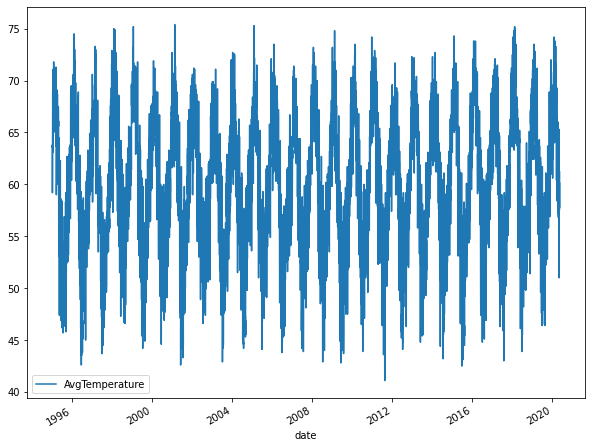

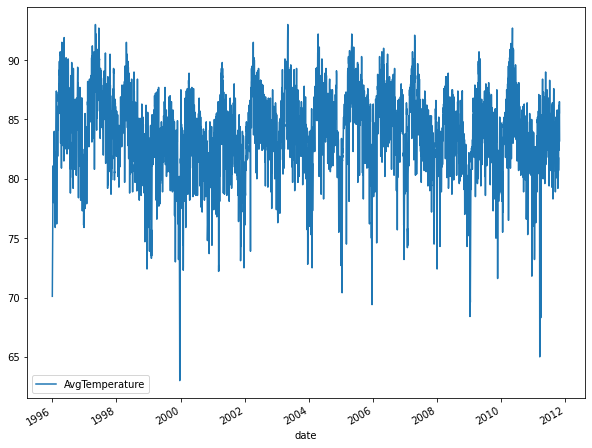

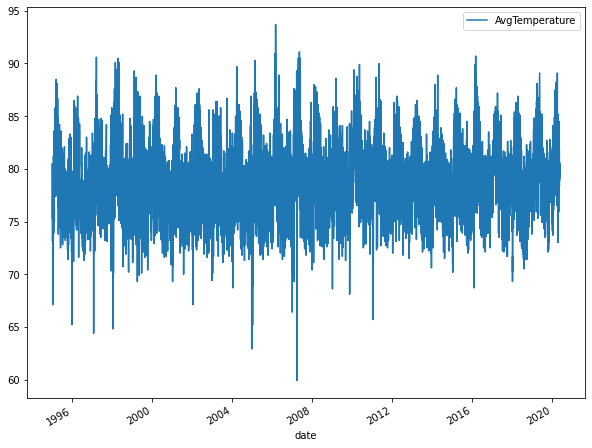

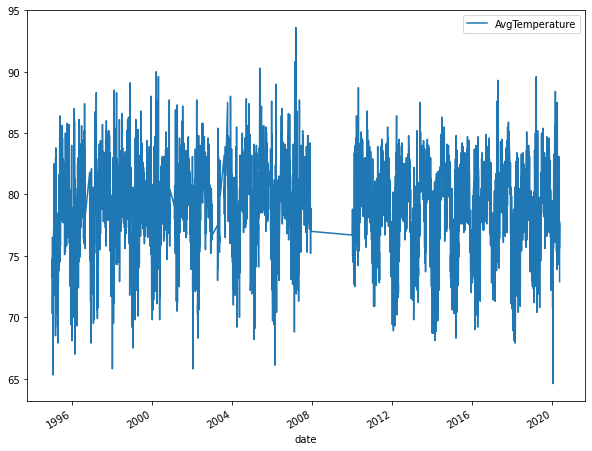

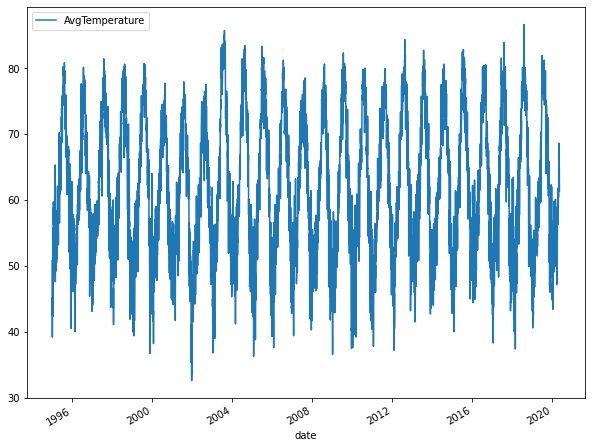

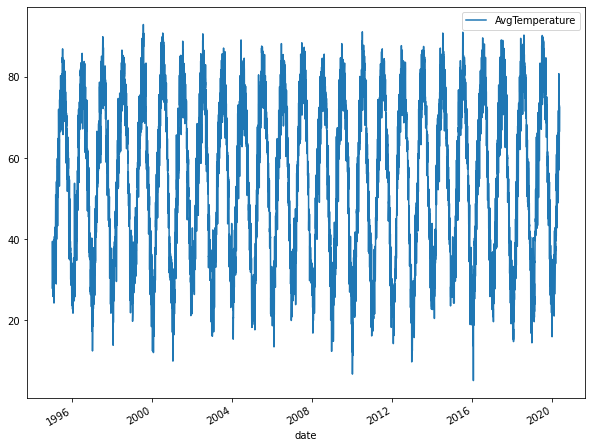

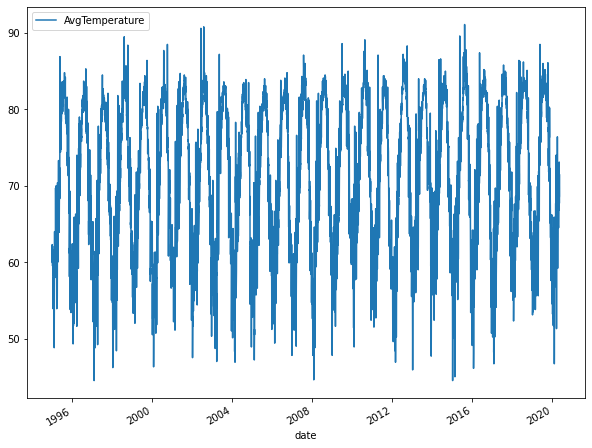

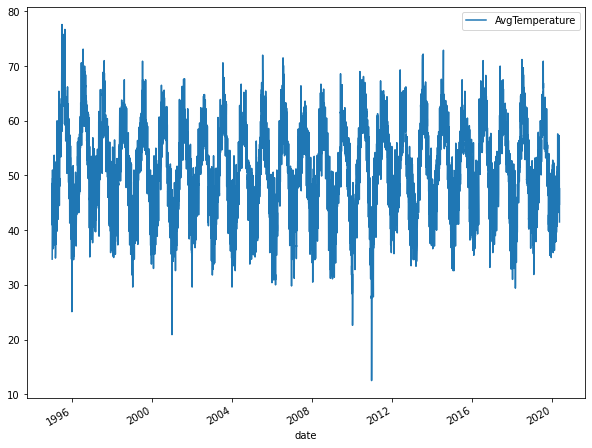

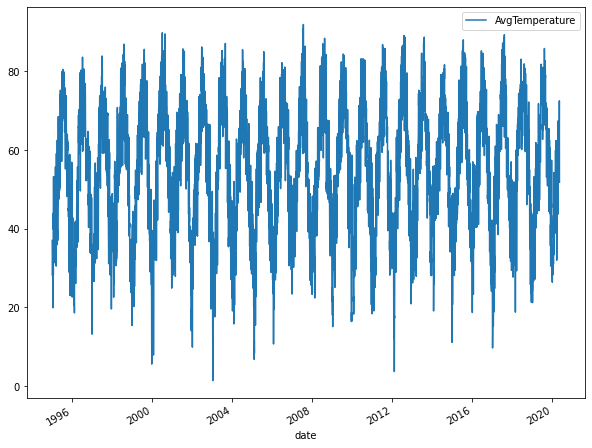

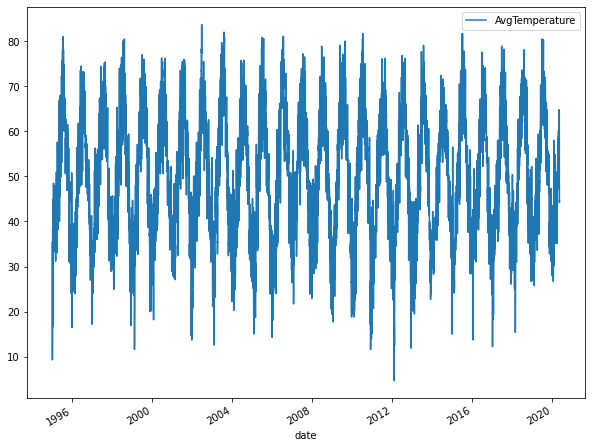

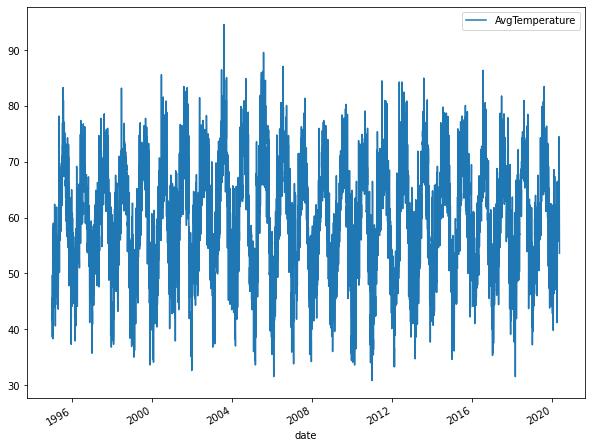

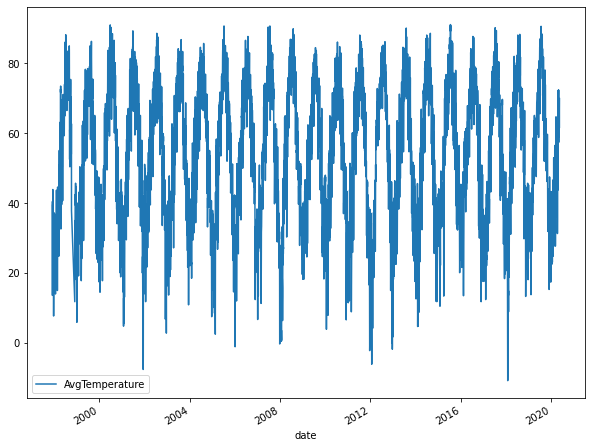

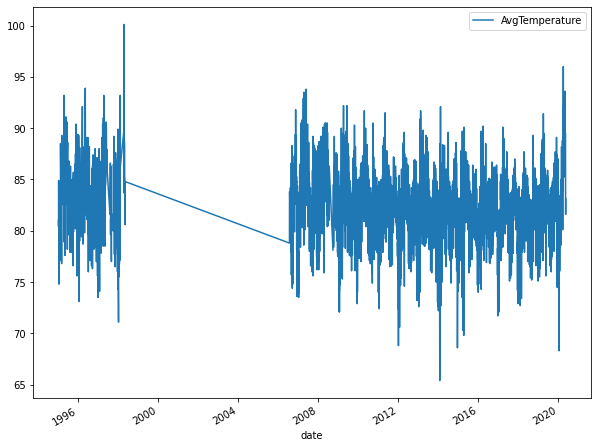

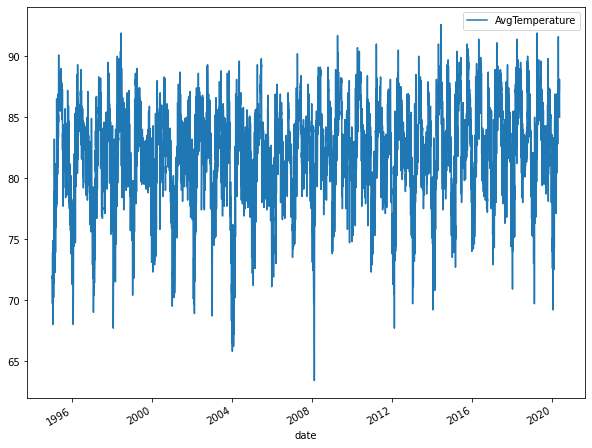

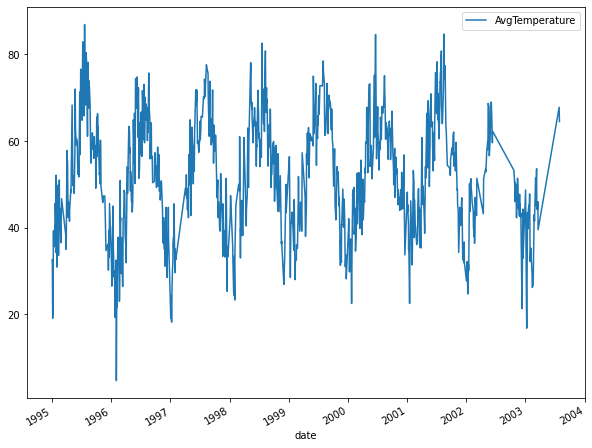

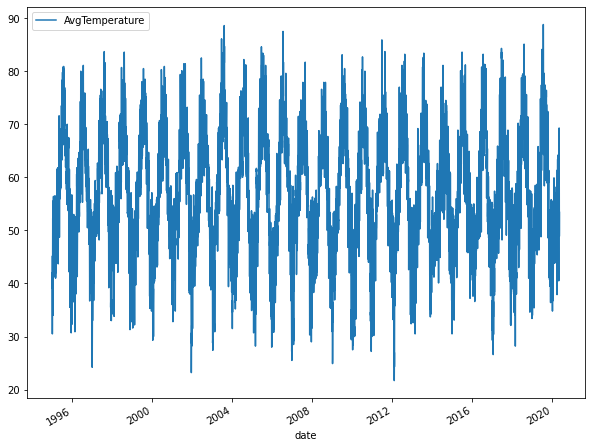

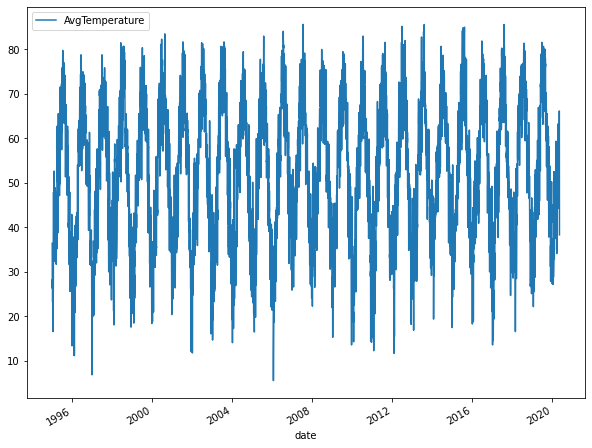

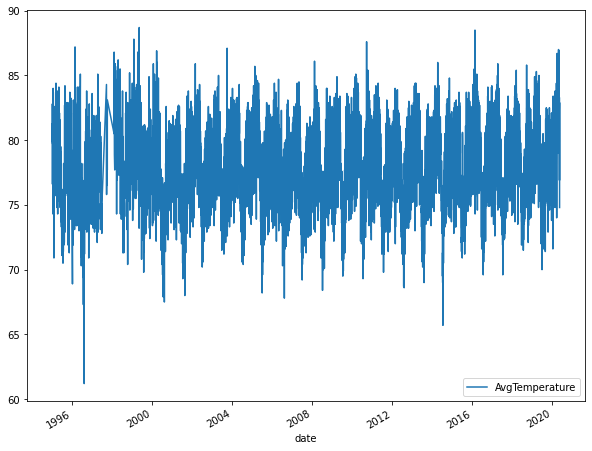

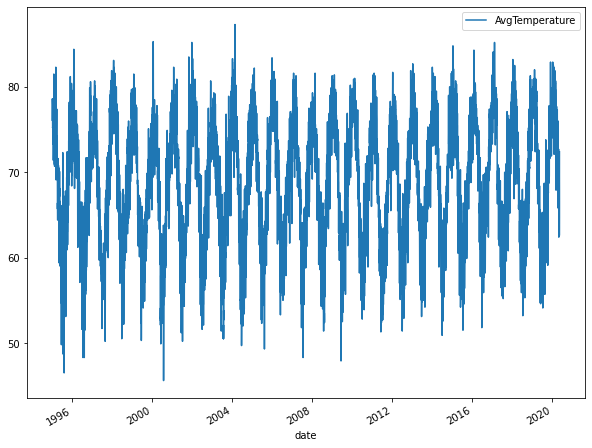

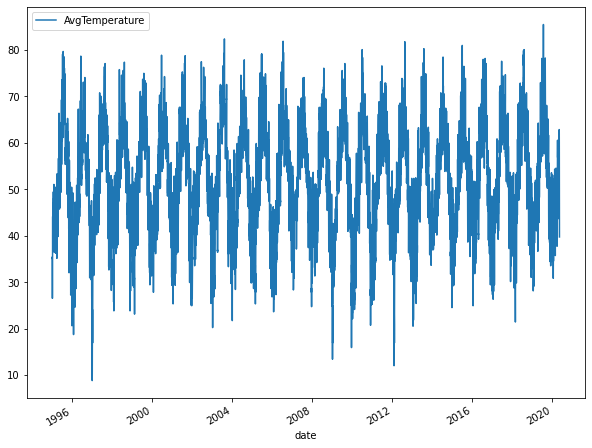

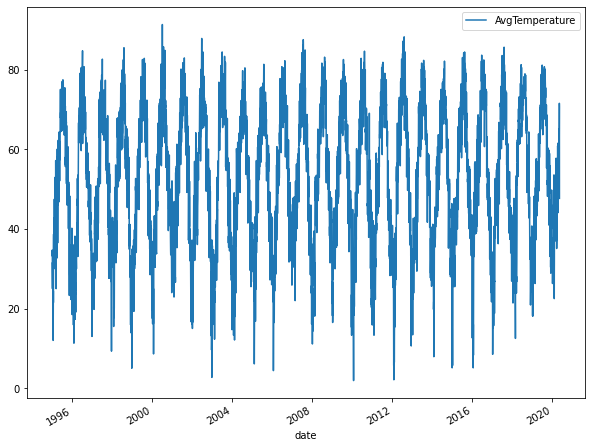

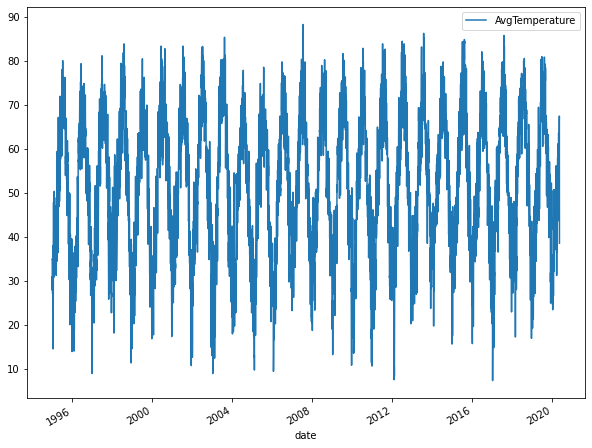

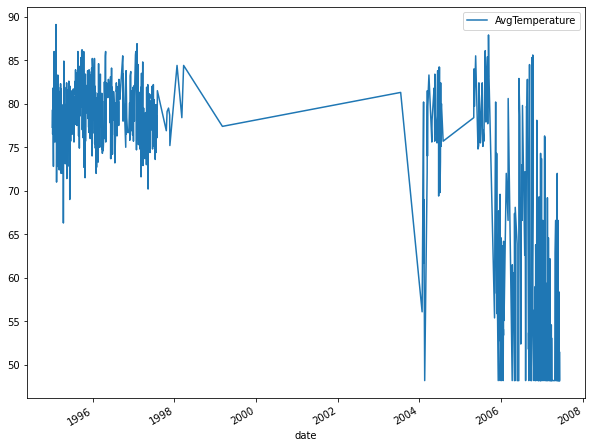

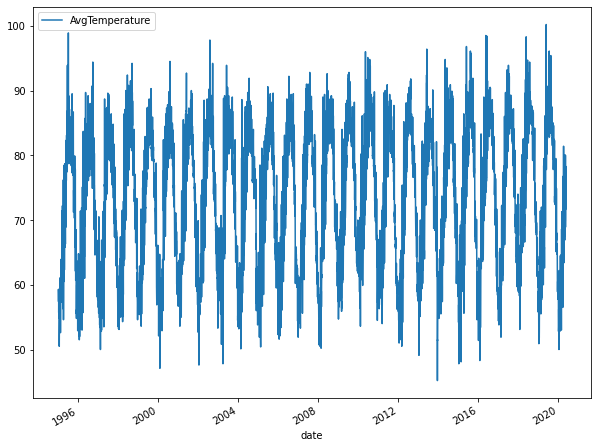

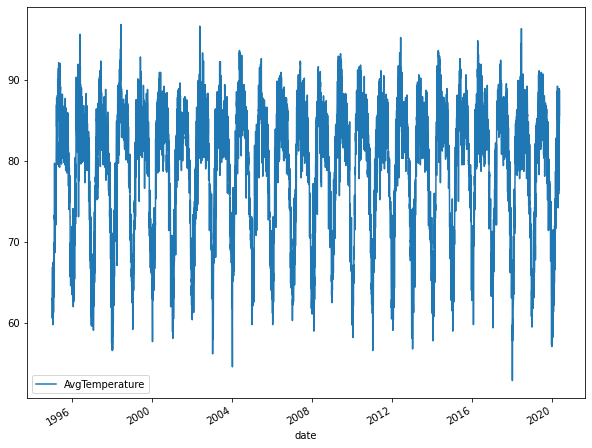

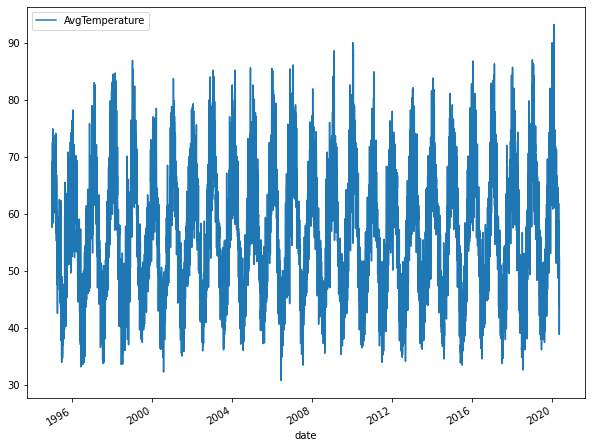

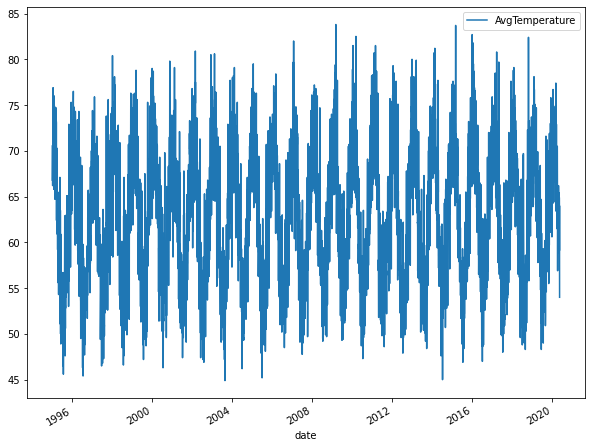

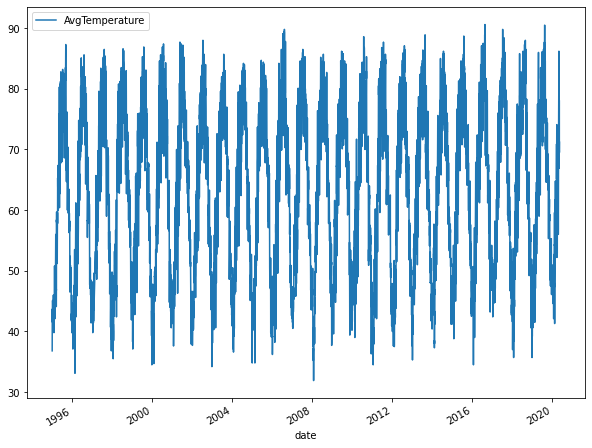

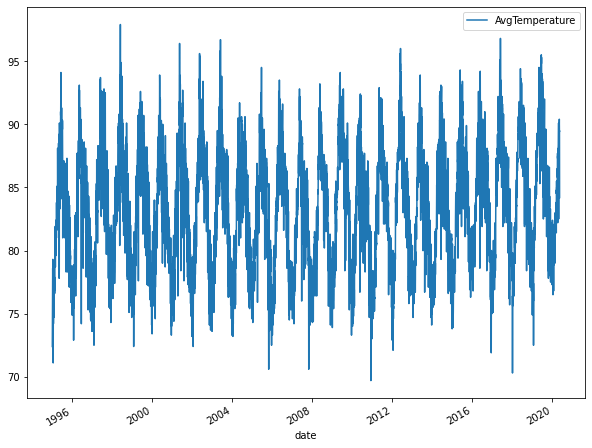

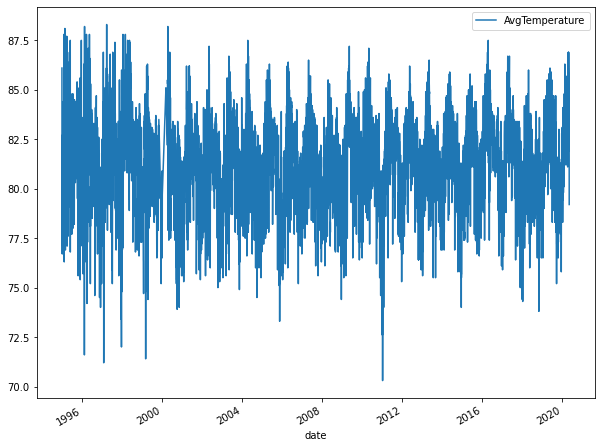

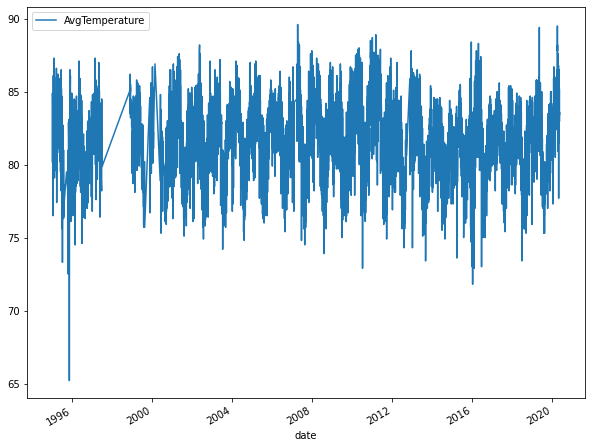

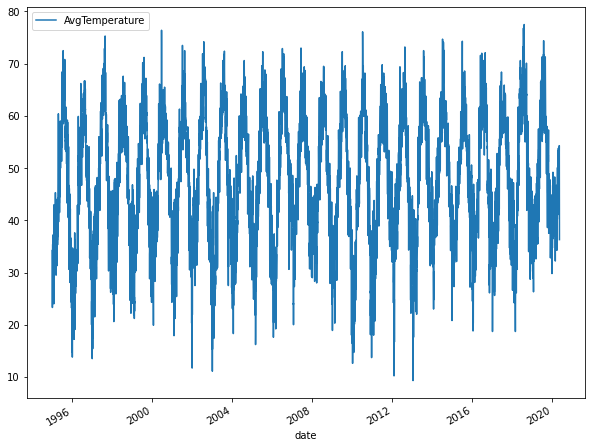

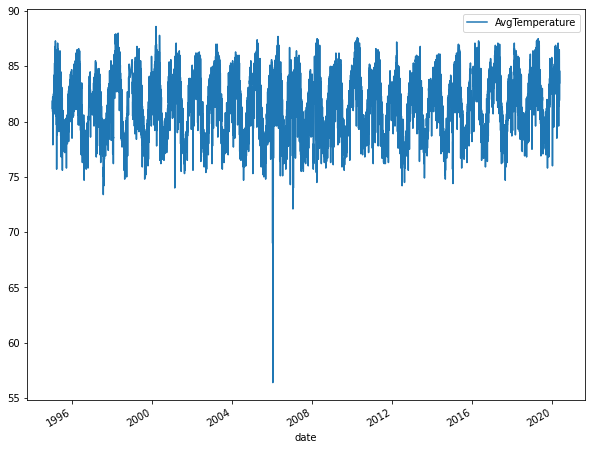

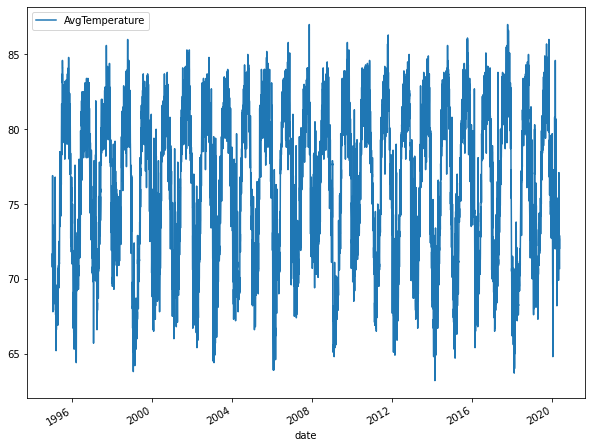

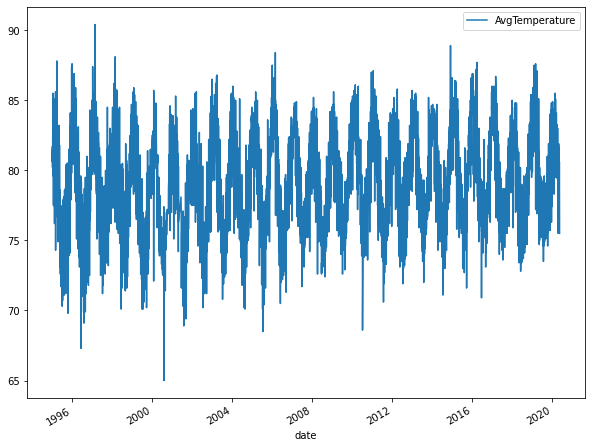

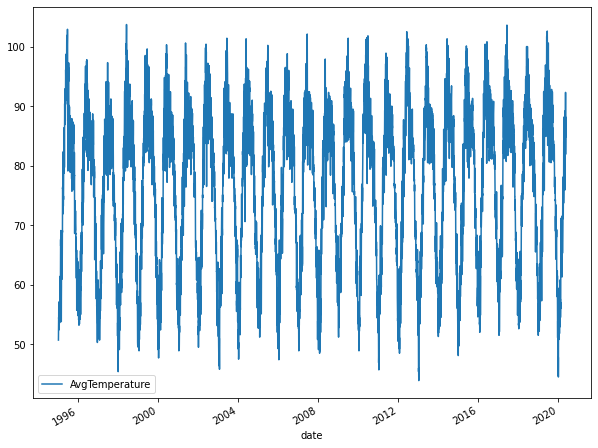

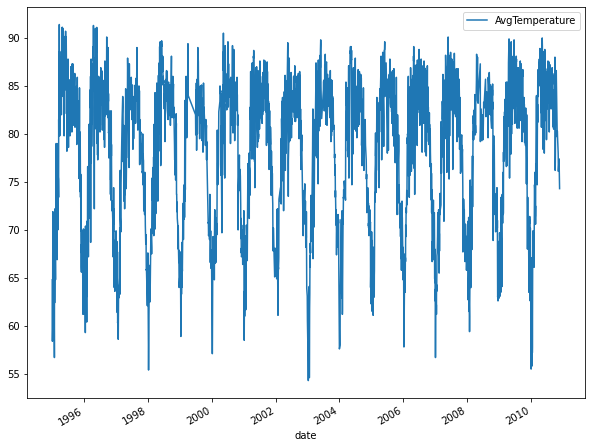

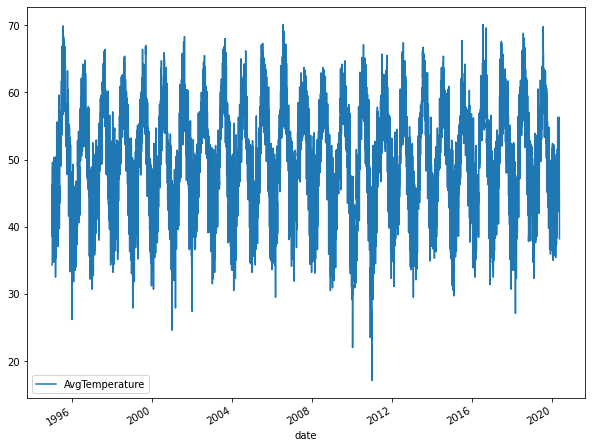

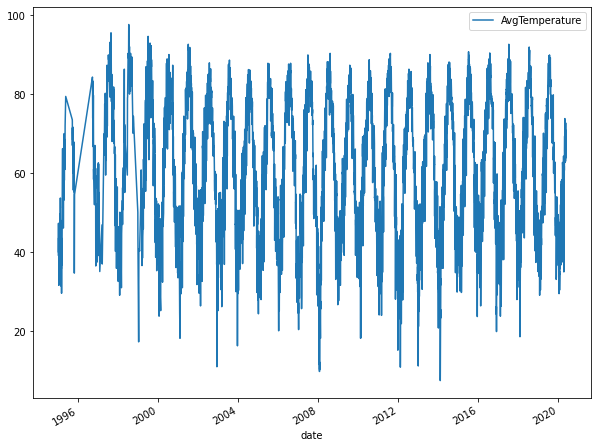

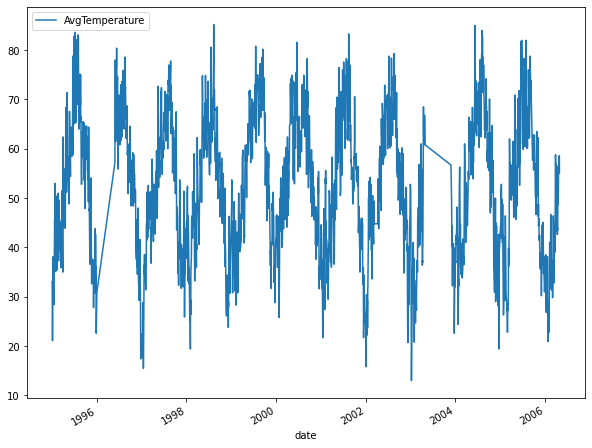

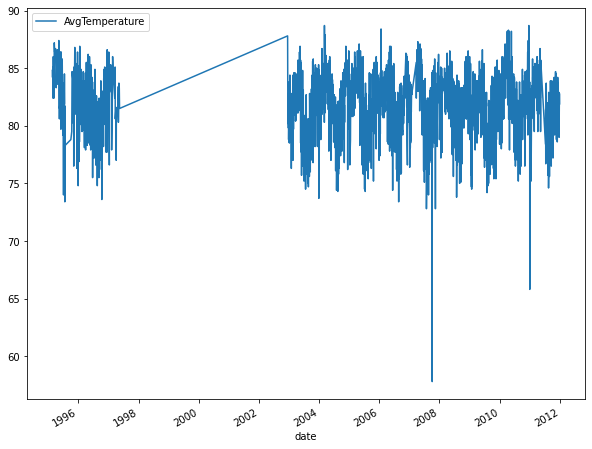

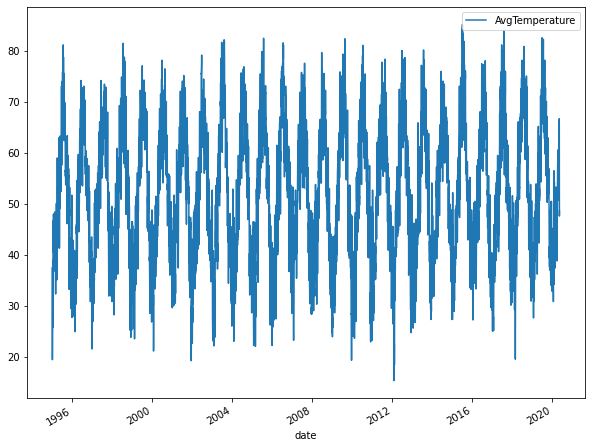

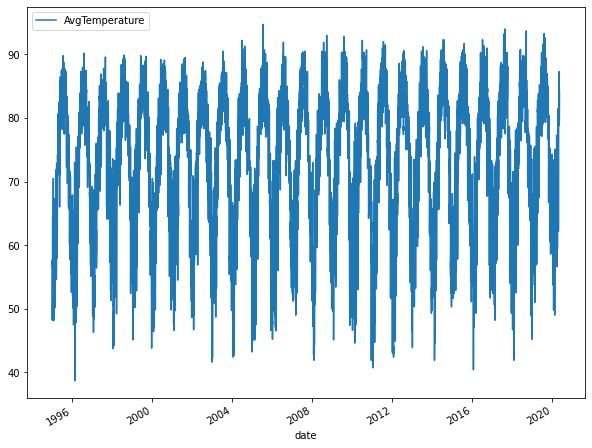

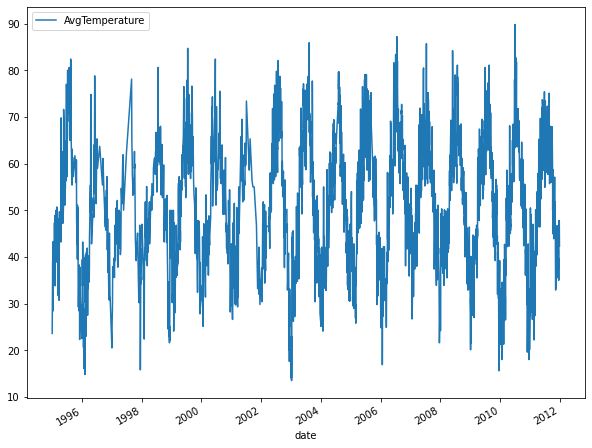

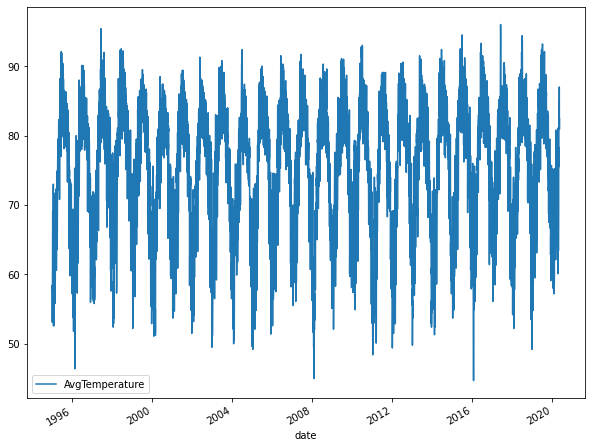

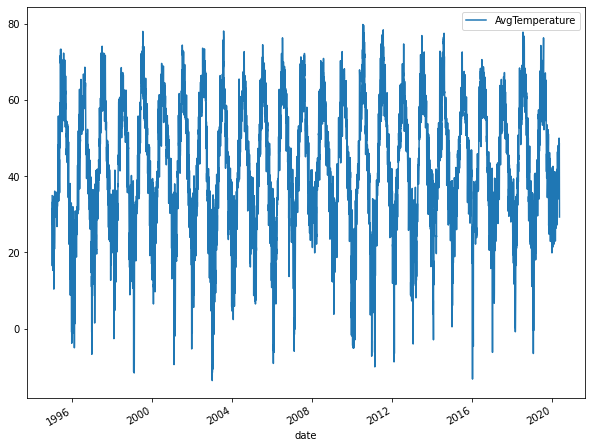

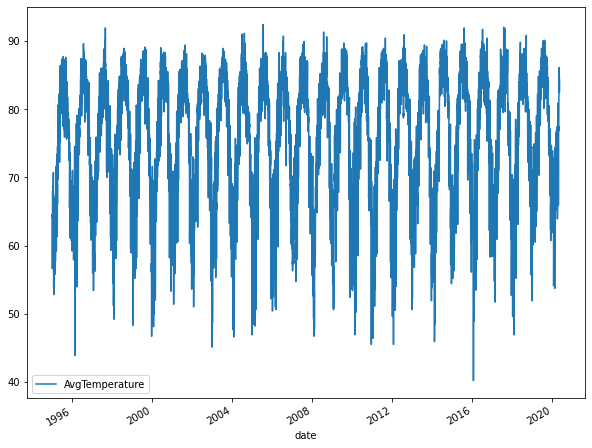

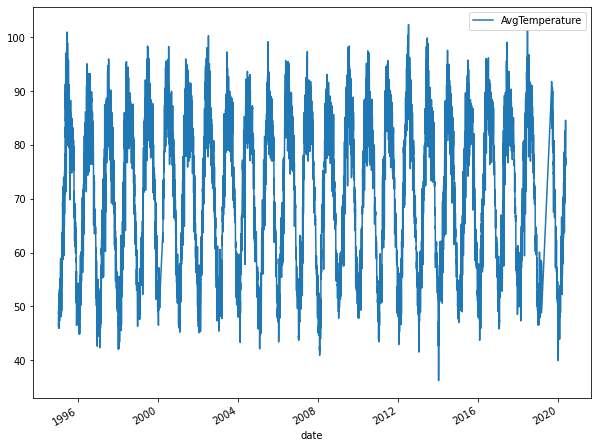

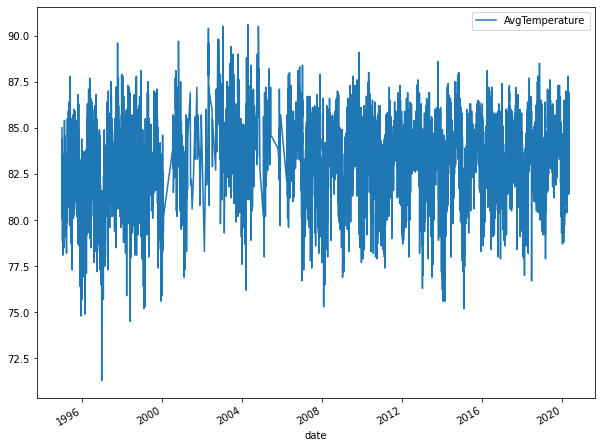

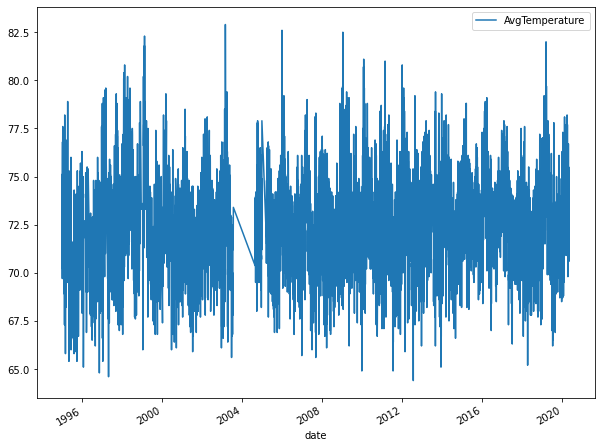

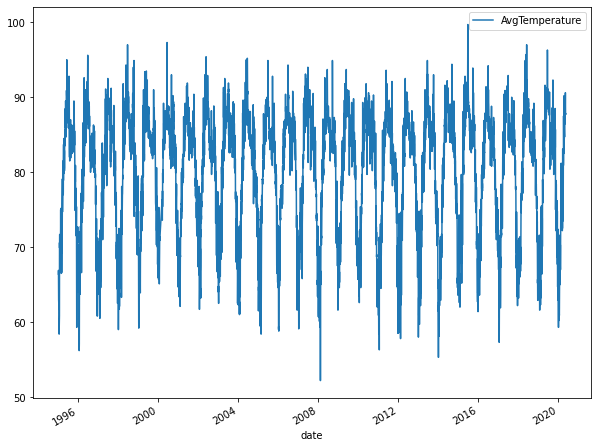

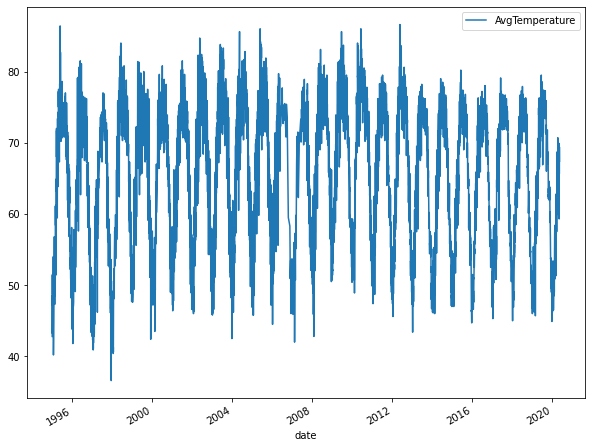

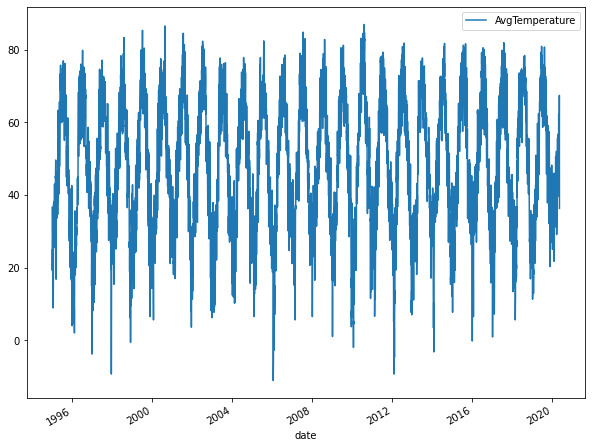

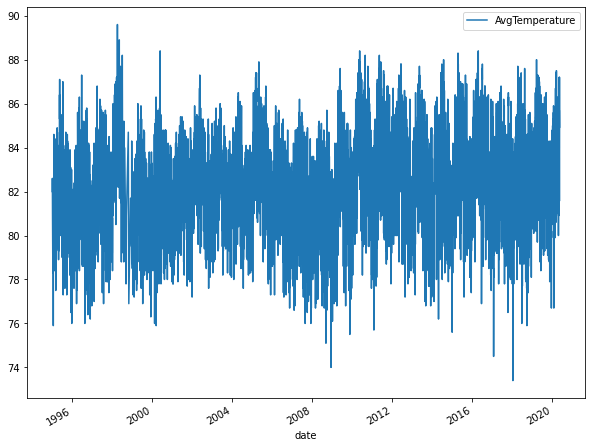

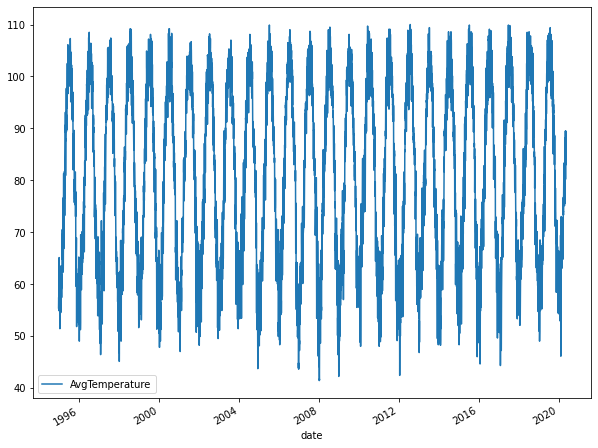

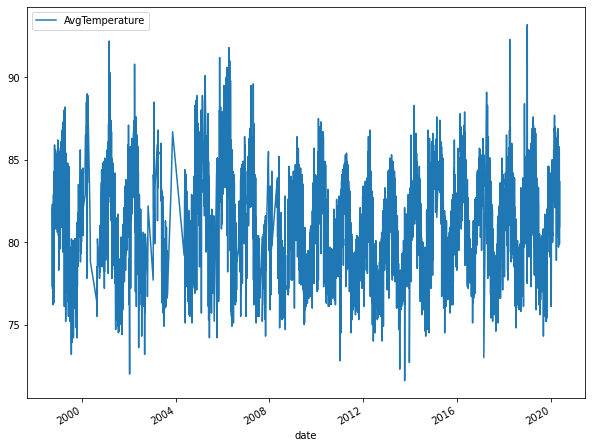

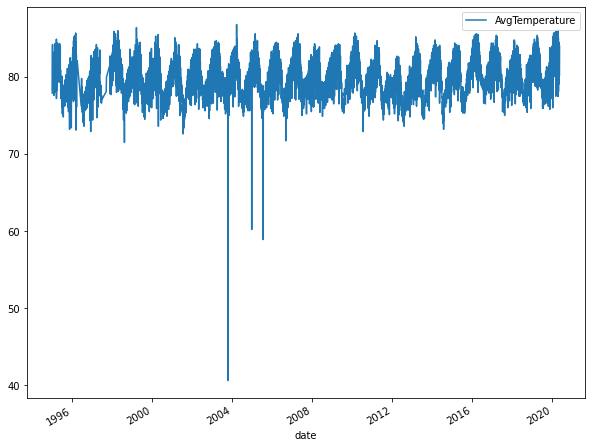

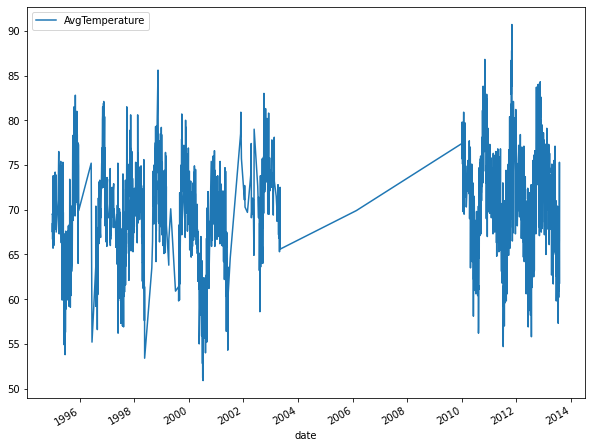

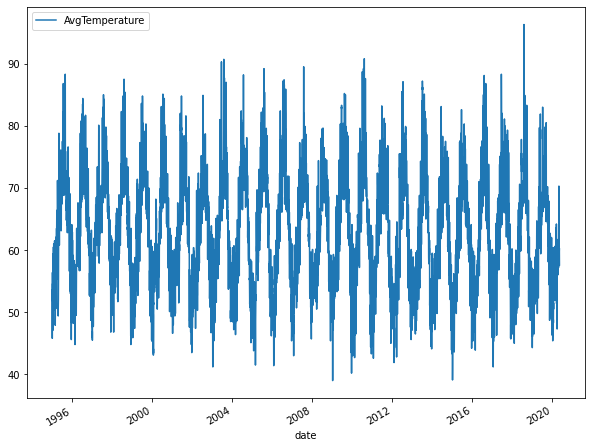

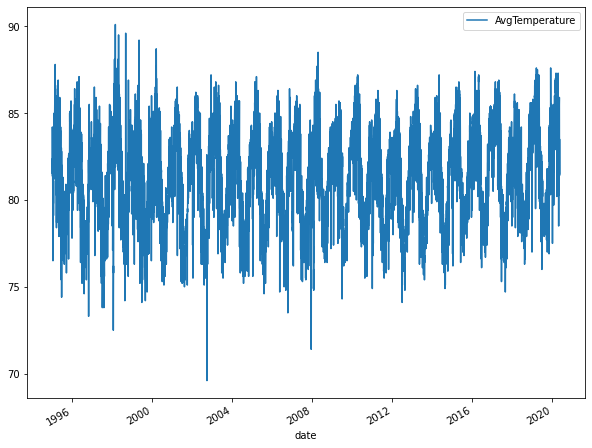

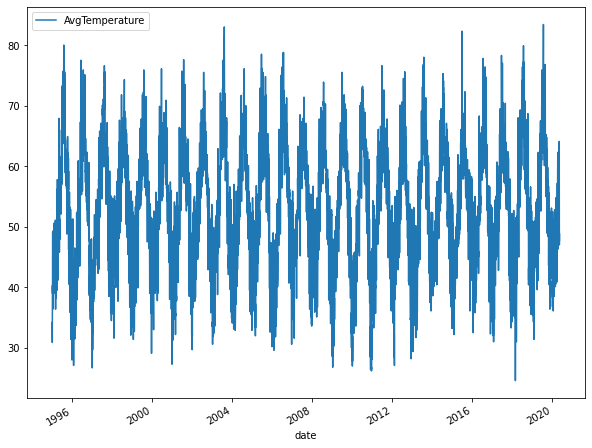

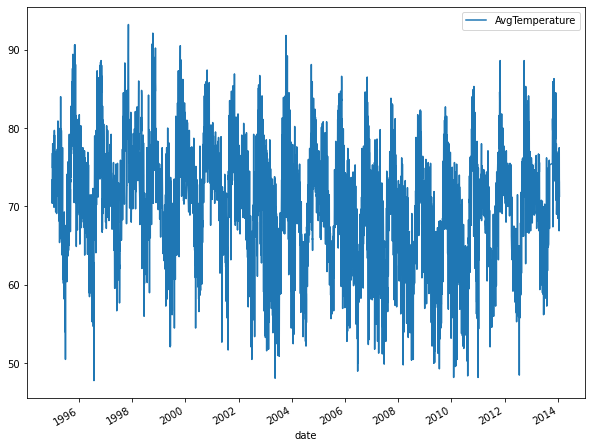

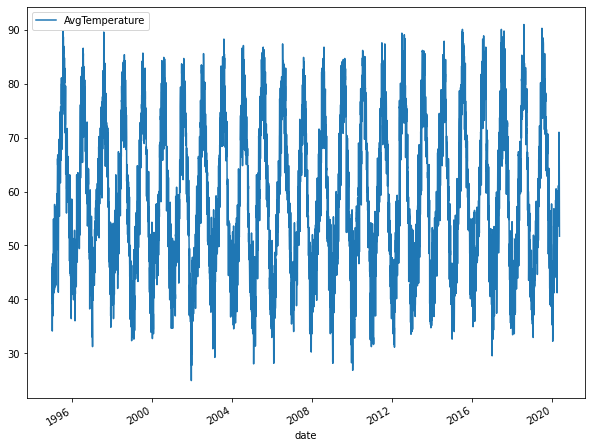

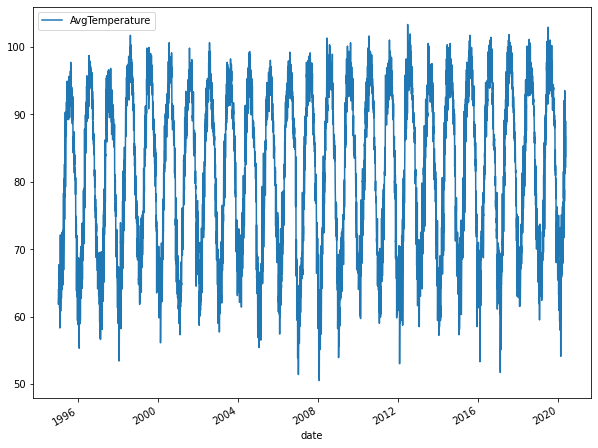

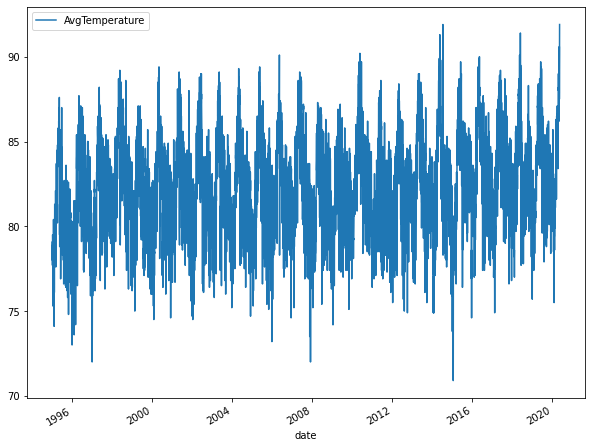

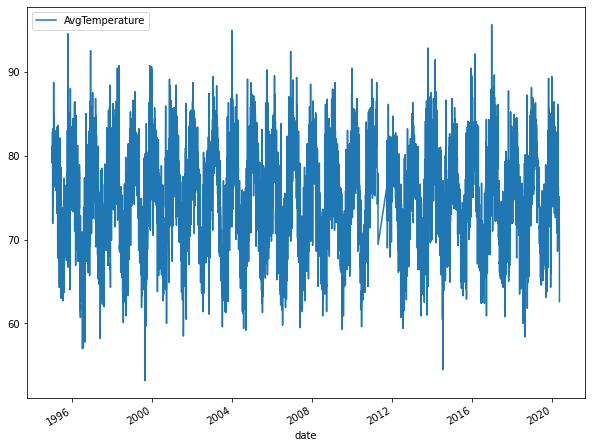

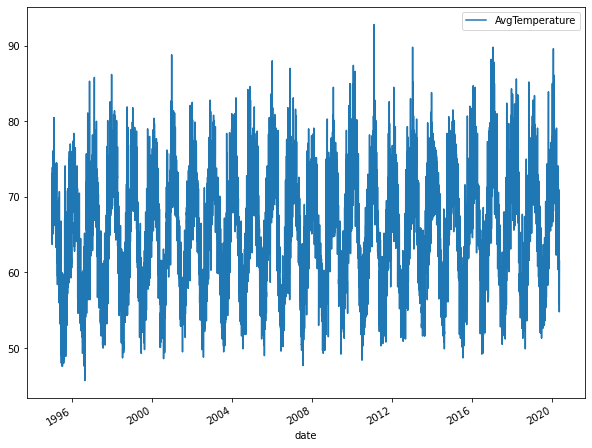

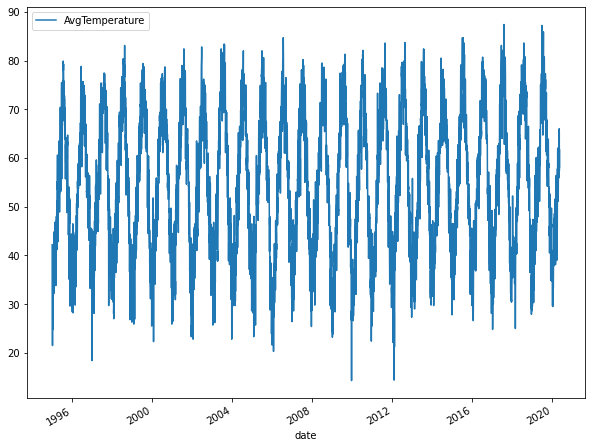

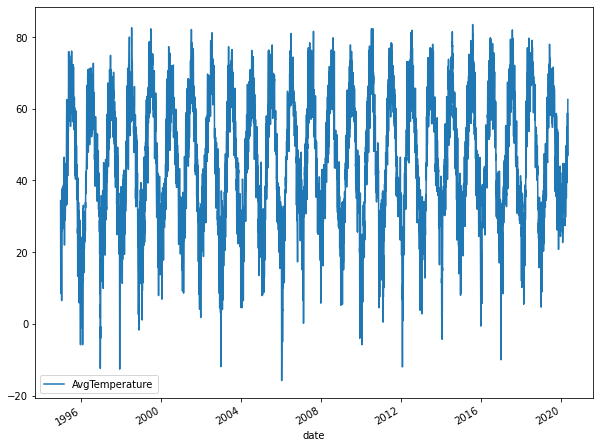

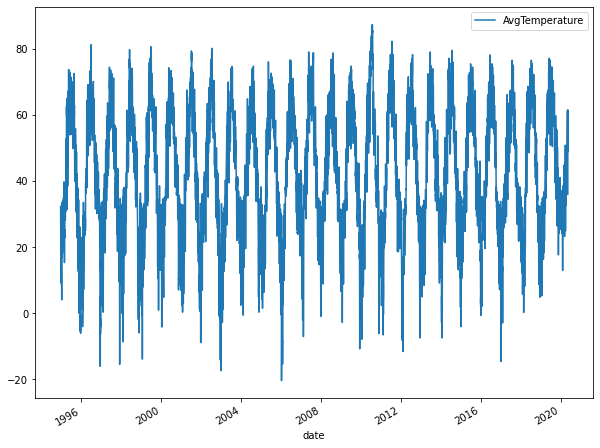

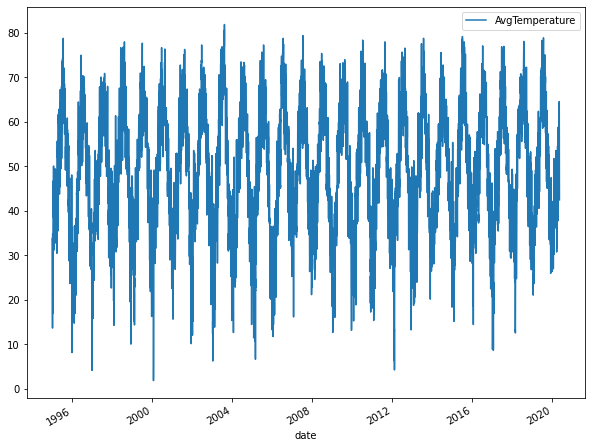

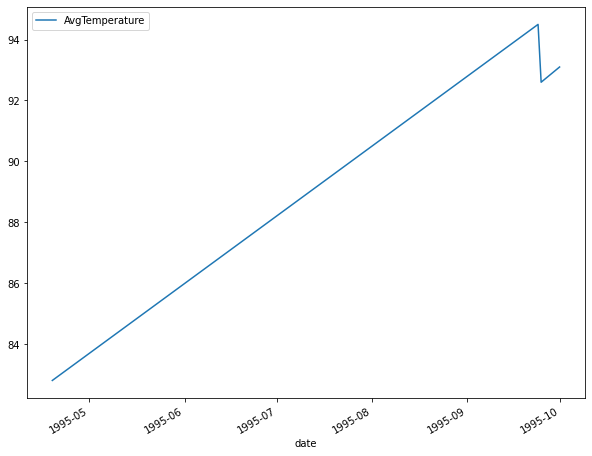

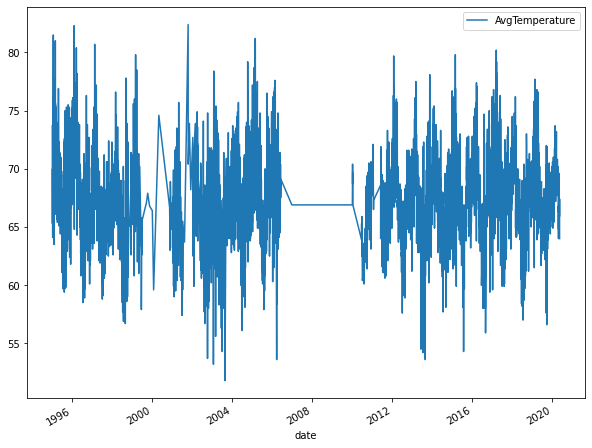

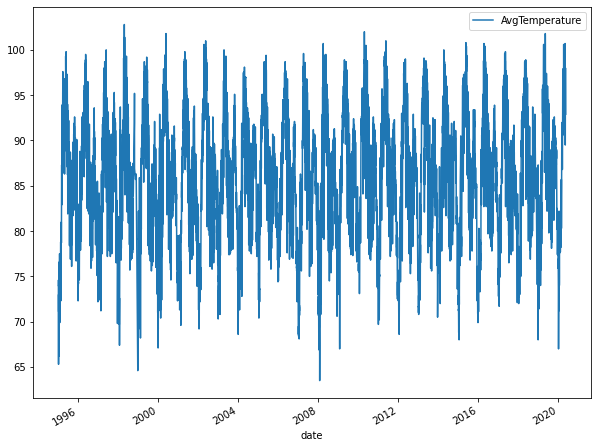

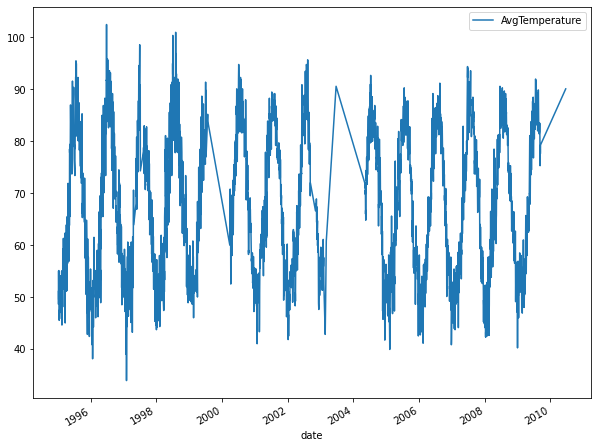

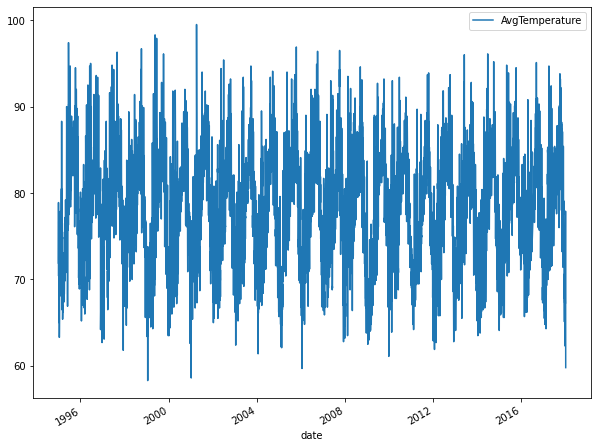

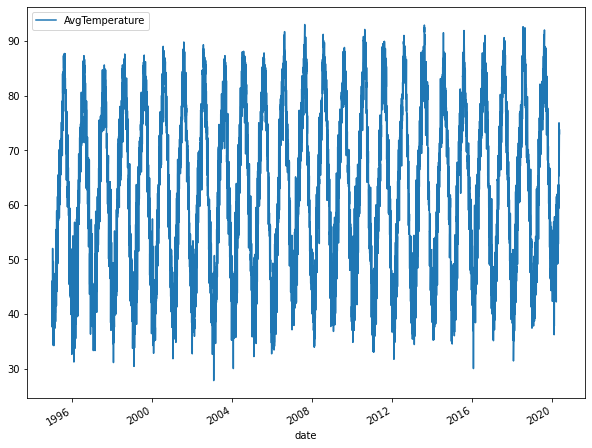

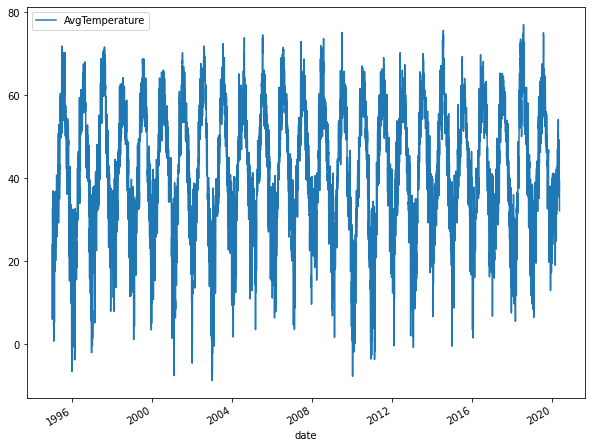

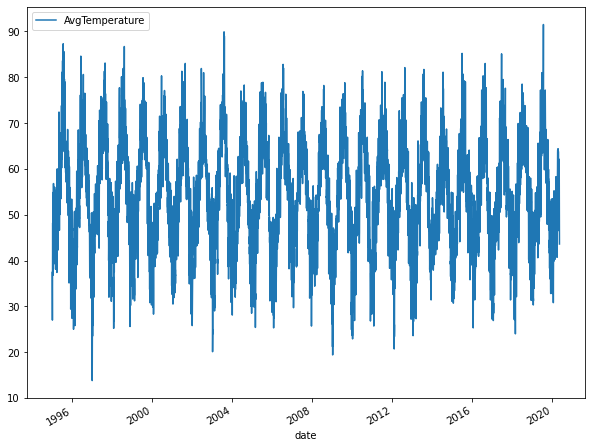

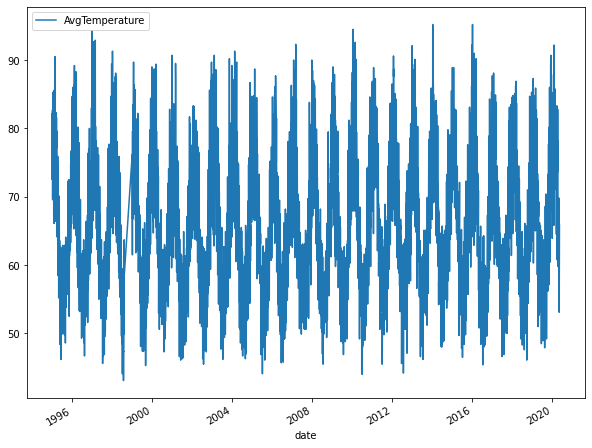

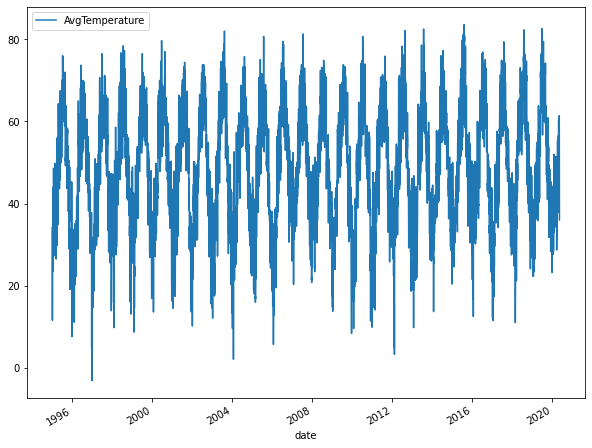

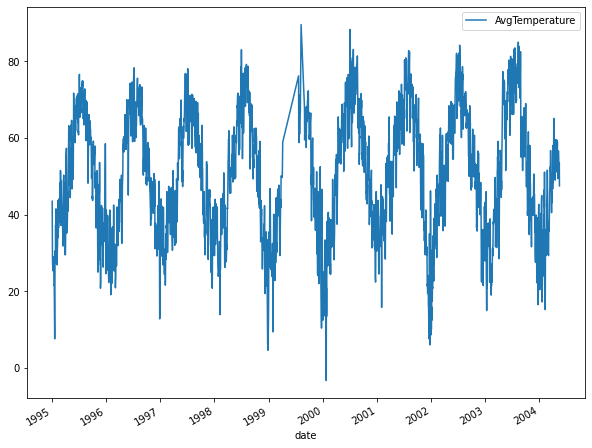

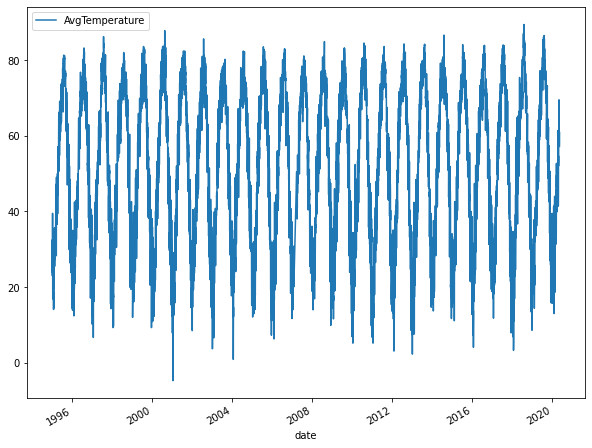

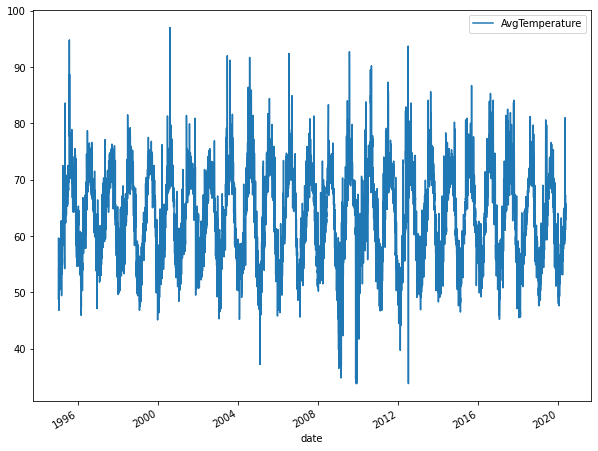

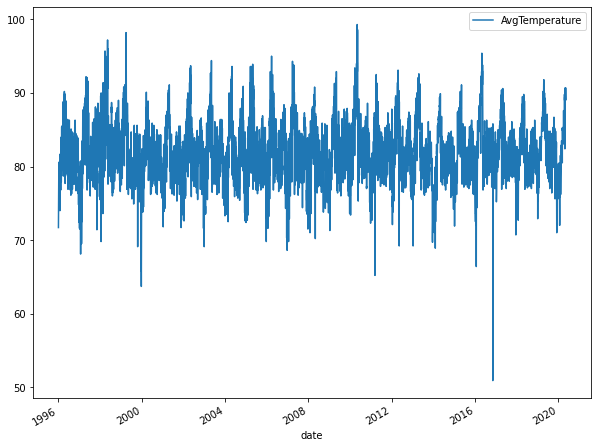

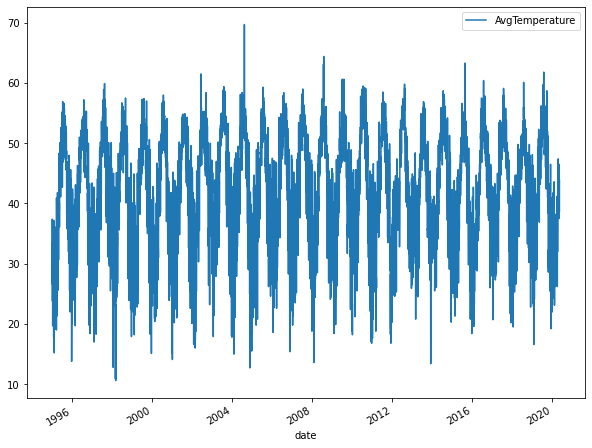

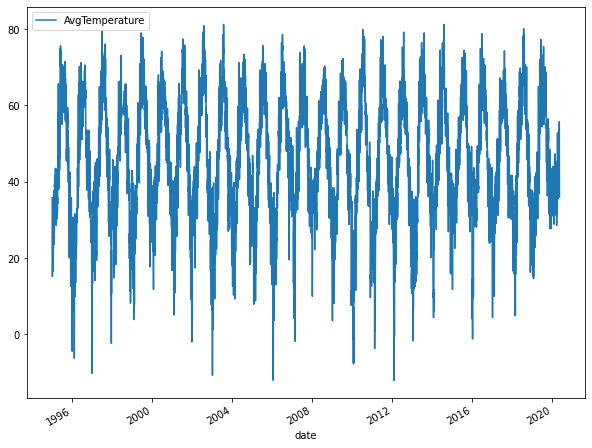

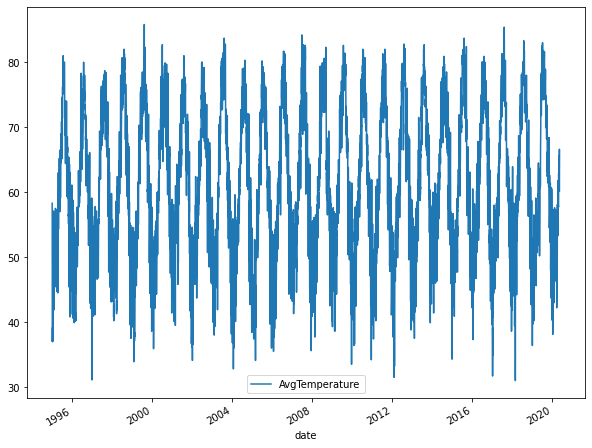

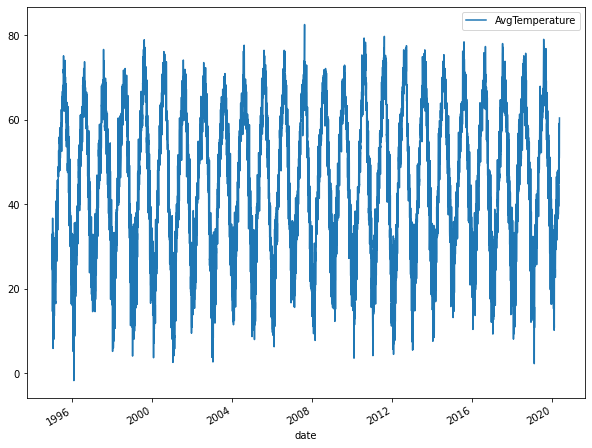

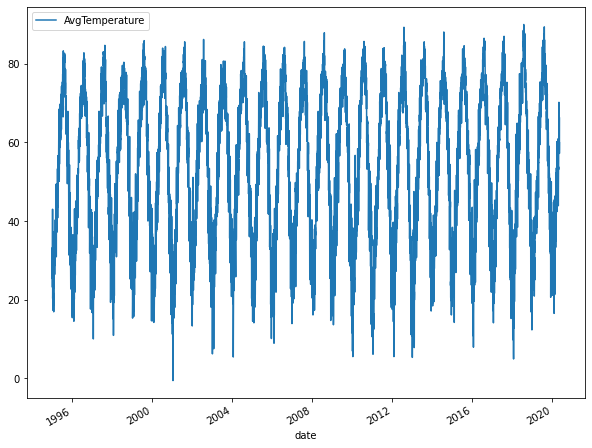

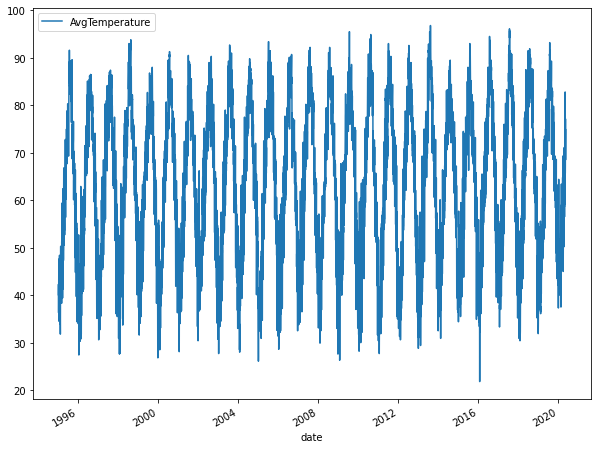

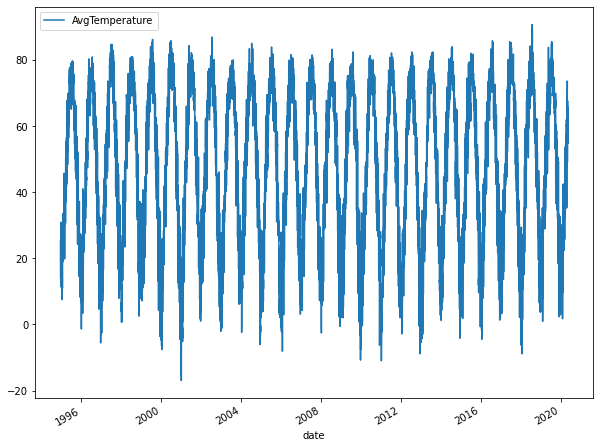

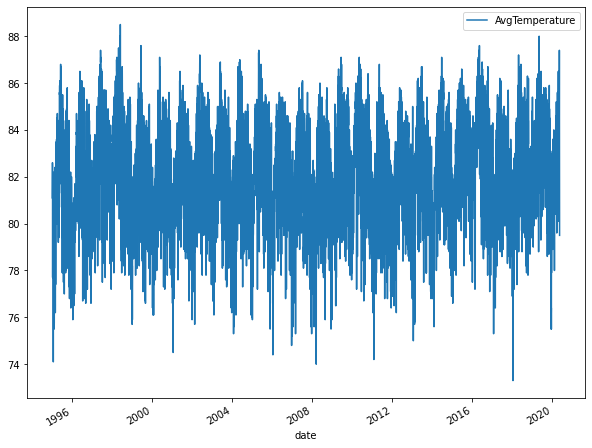

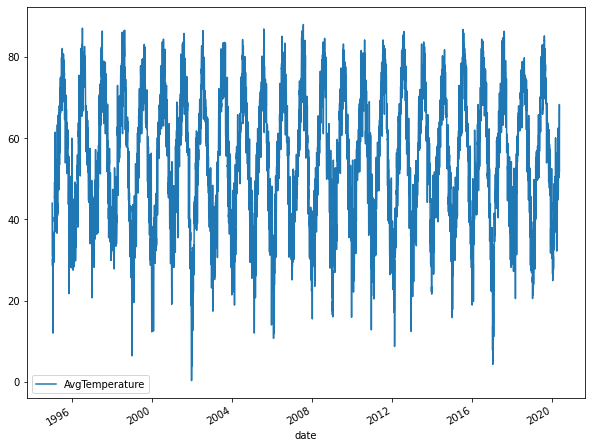

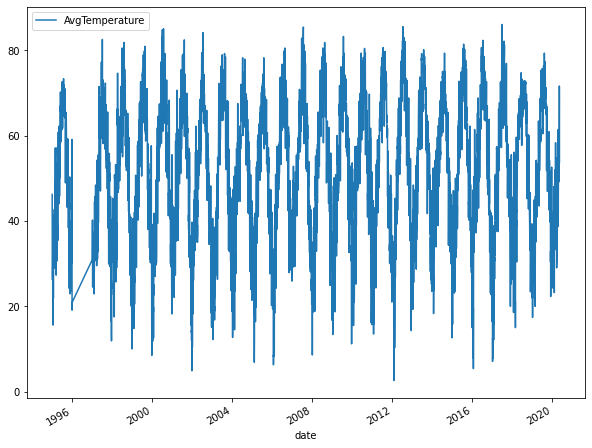

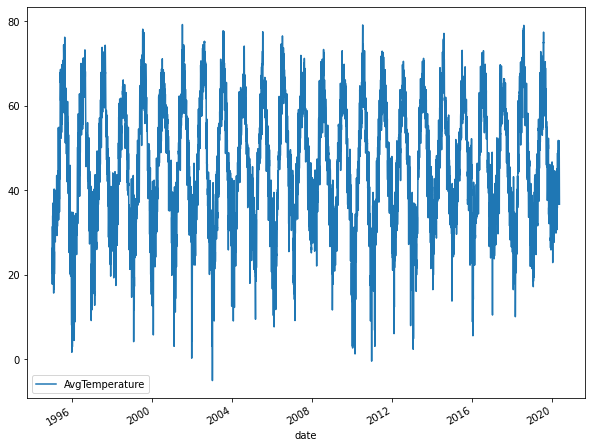

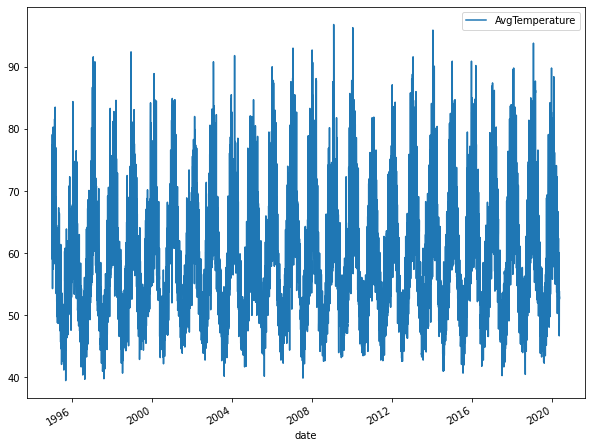

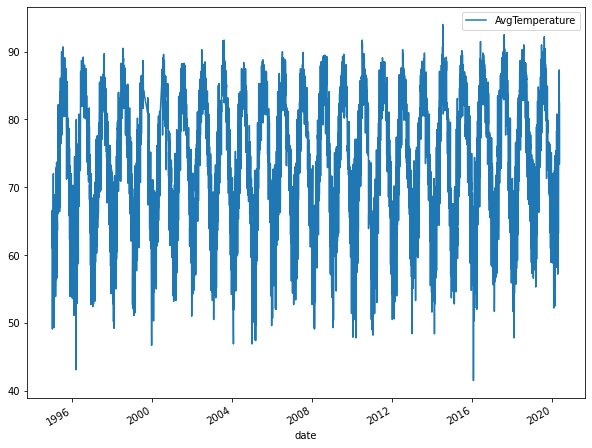

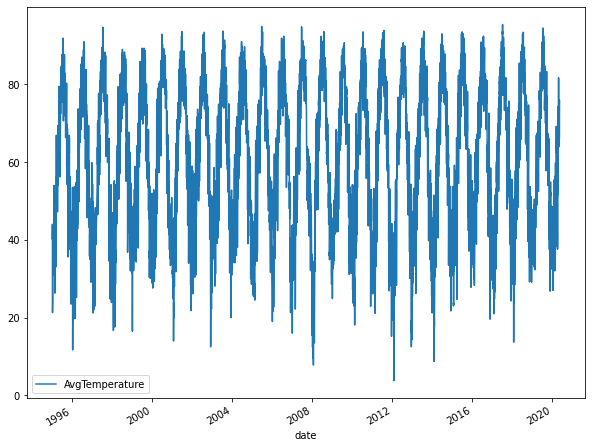

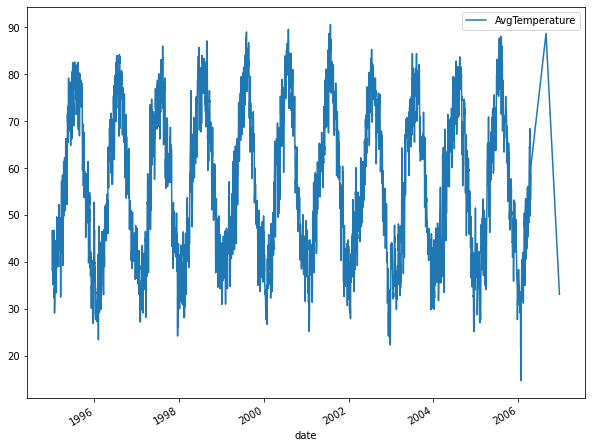

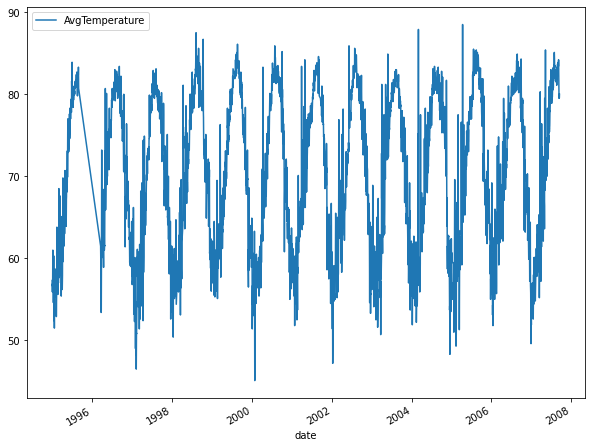

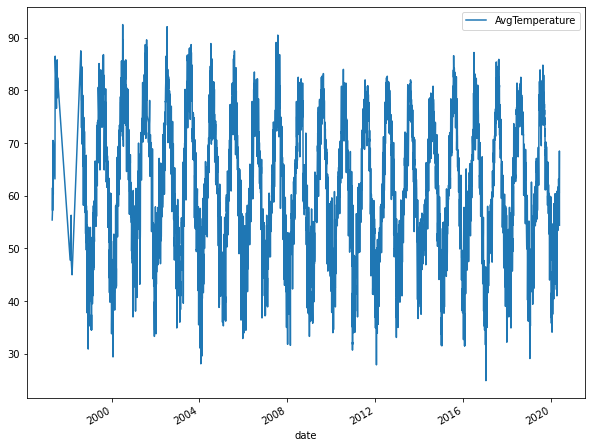

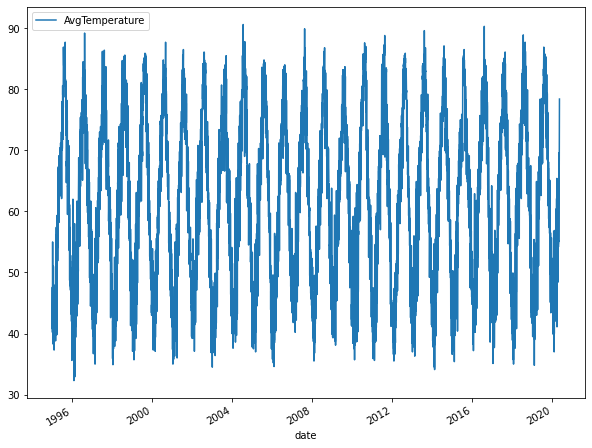

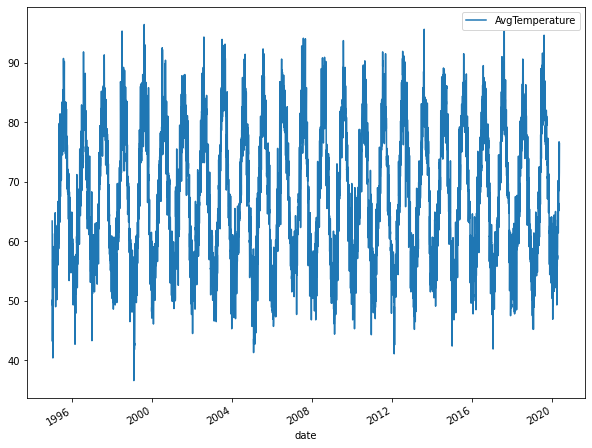

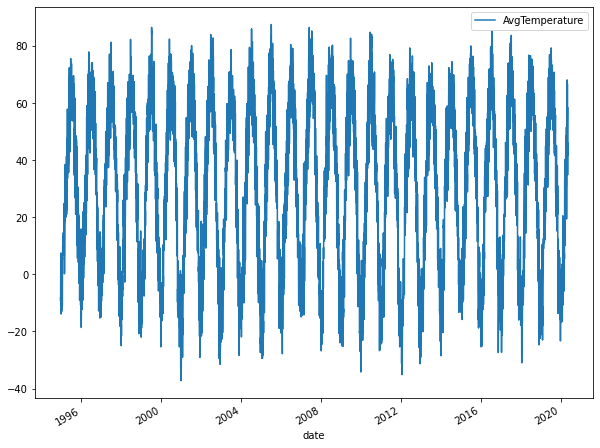

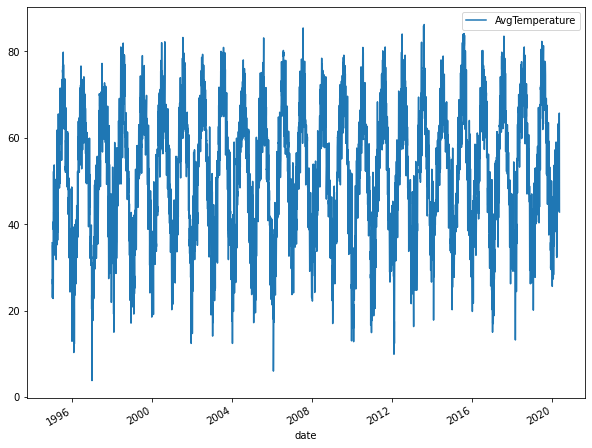

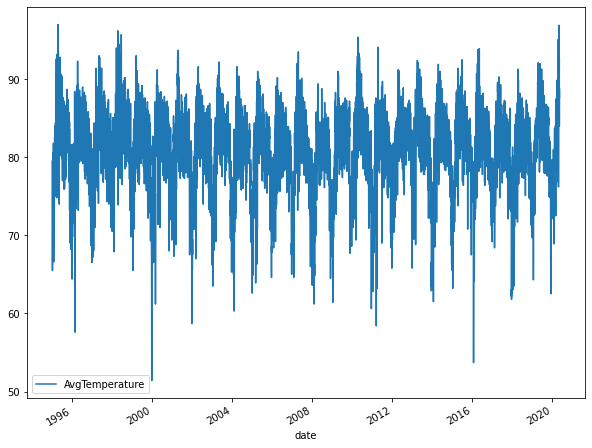

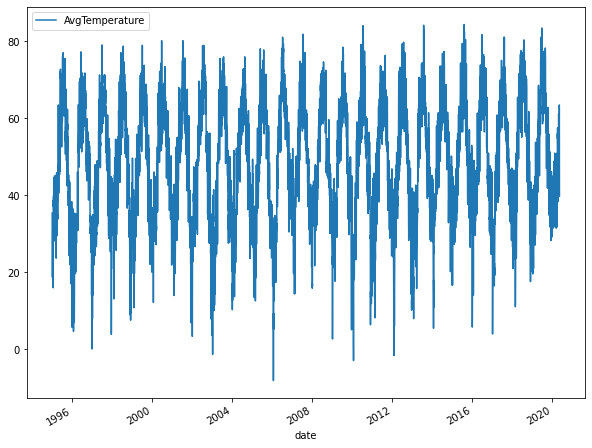

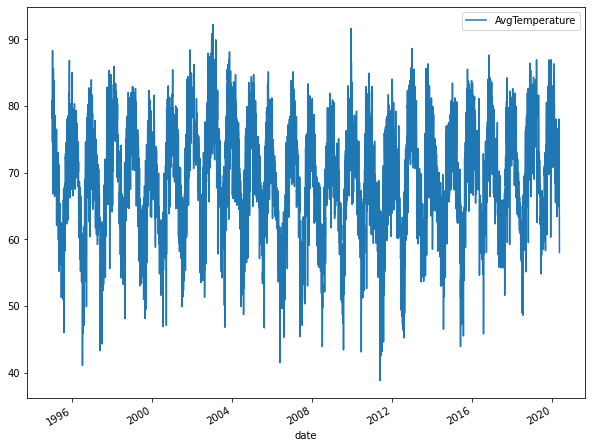

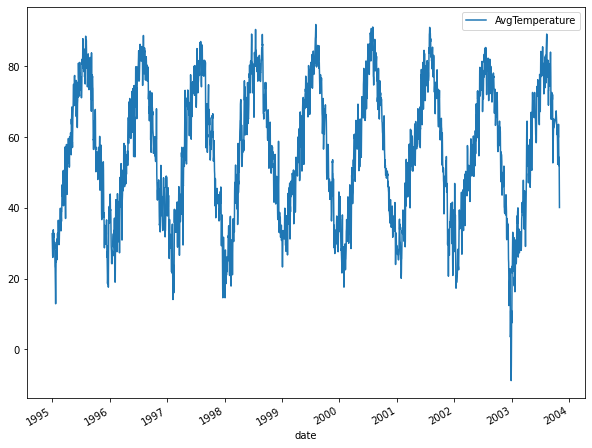

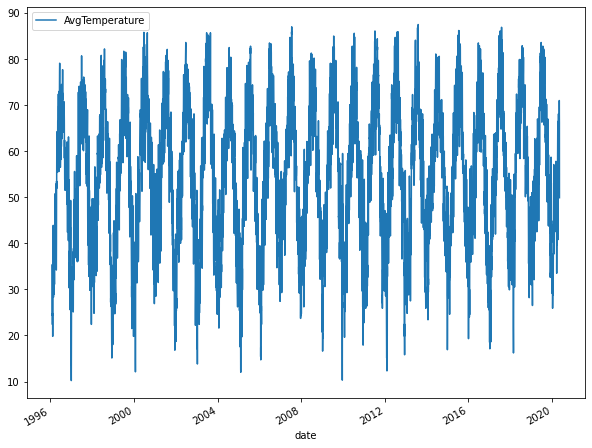

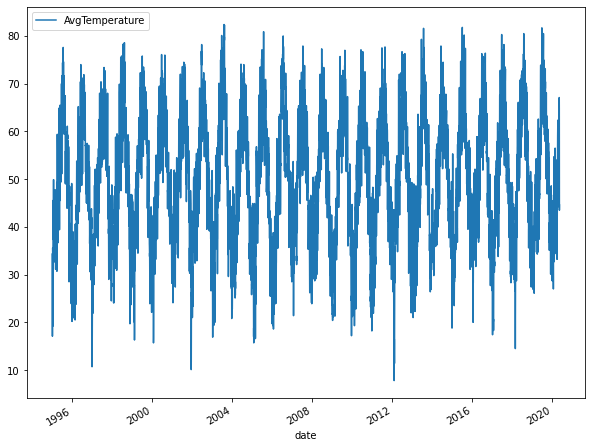

In [ ]:
df.set_index('date').groupby('City').plot()
plt.show()

In [ ]:
df['City']=df['City'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
d = dict(enumerate(df['City'].cat.categories))
df['City_cat'] = df['City'].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from pyspark.sql import SparkSession
import pyspark
spark=SparkSession.builder.master('local').getOrCreate()

In [ ]:
data=spark.createDataFrame(df)

In [ ]:
data.show()

+-------------------+-------+--------------+--------+
|               date|   City|AvgTemperature|City_cat|
+-------------------+-------+--------------+--------+
|1995-01-01 00:00:00|Algiers|          64.2|       2|
|1995-01-02 00:00:00|Algiers|          49.4|       2|
|1995-01-03 00:00:00|Algiers|          48.8|       2|
|1995-01-04 00:00:00|Algiers|          46.4|       2|
|1995-01-05 00:00:00|Algiers|          47.9|       2|
|1995-01-06 00:00:00|Algiers|          48.7|       2|
|1995-01-07 00:00:00|Algiers|          48.9|       2|
|1995-01-08 00:00:00|Algiers|          49.1|       2|
|1995-01-09 00:00:00|Algiers|          49.0|       2|
|1995-01-10 00:00:00|Algiers|          51.9|       2|
|1995-01-11 00:00:00|Algiers|          51.7|       2|
|1995-01-12 00:00:00|Algiers|          51.3|       2|
|1995-01-13 00:00:00|Algiers|          47.0|       2|
|1995-01-14 00:00:00|Algiers|          46.9|       2|
|1995-01-15 00:00:00|Algiers|          47.5|       2|
|1995-01-16 00:00:00|Algiers

In [ ]:
data.printSchema()

root
 |-- date: timestamp (nullable = true)
 |-- City: string (nullable = true)
 |-- AvgTemperature: double (nullable = true)
 |-- City_cat: long (nullable = true)



In [ ]:
data.groupBy('City').count().show()

+----------+-----+
|      City|count|
+----------+-----+
|     Cairo| 9227|
| Guangzhou| 9235|
|    Bissau| 5181|
|    Prague| 9236|
|    Madrid| 9238|
|  Canberra| 9217|
| Singapore| 9236|
|   Jakarta| 6858|
|Libreville| 8773|
| Frankfurt| 2331|
|    Almaty| 9230|
|   Beijing| 9237|
|      Bern| 9216|
|    Lisbon| 9222|
|     Rabat| 9229|
| Stockholm| 9233|
|     Amman| 9234|
|  Auckland| 9207|
|  Katmandu| 8336|
| Pyongyang| 9041|
+----------+-----+
only showing top 20 rows



In [ ]:
data.createOrReplaceTempView("City")

In [ ]:
sql = 'SELECT City_cat,date as ds,sum(AvgTemperature) as y FROM City GROUP BY City_cat, ds ORDER BY City_cat, ds'

In [ ]:
spark.sql(sql).show()

+--------+-------------------+----+
|City_cat|                 ds|   y|
+--------+-------------------+----+
|       0|1995-01-01 00:00:00|82.6|
|       0|1995-01-02 00:00:00|82.3|
|       0|1995-01-03 00:00:00|81.0|
|       0|1995-01-04 00:00:00|83.3|
|       0|1995-01-05 00:00:00|83.4|
|       0|1995-01-06 00:00:00|84.1|
|       0|1995-01-07 00:00:00|82.5|
|       0|1995-01-08 00:00:00|81.3|
|       0|1995-01-09 00:00:00|79.7|
|       0|1995-01-10 00:00:00|80.9|
|       0|1995-01-11 00:00:00|77.5|
|       0|1995-01-12 00:00:00|73.8|
|       0|1995-01-13 00:00:00|73.0|
|       0|1995-01-14 00:00:00|74.9|
|       0|1995-01-15 00:00:00|76.7|
|       0|1995-01-16 00:00:00|78.9|
|       0|1995-01-17 00:00:00|80.9|
|       0|1995-01-18 00:00:00|80.1|
|       0|1995-01-19 00:00:00|80.3|
|       0|1995-01-20 00:00:00|79.0|
+--------+-------------------+----+
only showing top 20 rows



In [ ]:
store_part = (spark.sql( sql ).repartition(spark.sparkContext.defaultParallelism, ['City_cat'])).cache()

In [ ]:
from pyspark.sql.types import *

result_schema =StructType([
  StructField('ds',TimestampType()),
  StructField('City_cat',IntegerType()),
  StructField('y',DoubleType()),
  StructField('yhat',DoubleType()),
  StructField('yhat_upper',DoubleType()),
  StructField('yhat_lower',DoubleType())
  ])

In [ ]:
from pyspark.sql.functions import pandas_udf, PandasUDFType

@pandas_udf( result_schema, PandasUDFType.GROUPED_MAP )
def forecast_sales( store_pd ):

  model = Prophet(interval_width=0.85)

  model.fit( store_pd )

  future_pd = model.make_future_dataframe(
    periods=365, 
    freq='D'
    )
  
  forecast_pd = model.predict( future_pd )  
  
  f_pd = forecast_pd[ ['ds','yhat', 'yhat_upper', 'yhat_lower'] ].set_index('ds')
  
  st_pd = store_pd[['ds','City_cat','y']].set_index('ds')
  
  results_pd = f_pd.join( st_pd, how='left' )
  results_pd.reset_index(level=0, inplace=True)
  
  results_pd['City_cat'] = store_pd['City_cat'].iloc[0]

  return results_pd[ ['ds', 'City_cat','y', 'yhat', 'yhat_upper', 'yhat_lower'] ]

In [ ]:
results = (
  store_part
    .groupBy('City_cat')
    .apply(forecast_sales))

/usr/local/lib/python3.7/dist-packages/pyspark/sql/pandas/group_ops.py:84: UserWarning:

It is preferred to use 'applyInPandas' over this API. This API will be deprecated in the future releases. See SPARK-28264 for more details.



In [ ]:
results.cache()

DataFrame[ds: timestamp, City_cat: int, y: double, yhat: double, yhat_upper: double, yhat_lower: double]

In [ ]:
results.coalesce(1)

DataFrame[ds: timestamp, City_cat: int, y: double, yhat: double, yhat_upper: double, yhat_lower: double]

In [ ]:
results.createOrReplaceTempView('forecasted')

In [ ]:
final_df = results.toPandas()

In [ ]:
final_df['city']=final_df['City_cat'].map(d)

In [ ]:
final_df

ds  City_cat     y       yhat  yhat_upper  yhat_lower     city
0       1995-01-01         0  82.6  80.737517   84.281384   77.085865  Abidjan
1       1995-01-02         0  82.3  80.862529   84.379756   77.561433  Abidjan
2       1995-01-03         0  81.0  80.873147   84.552567   77.056841  Abidjan
3       1995-01-04         0  83.3  80.816447   84.219191   77.377984  Abidjan
4       1995-01-05         0  83.4  80.859190   84.580561   77.248989  Abidjan
...            ...       ...   ...        ...         ...         ...      ...
1034415 2021-05-09       120   NaN  57.948687   67.256105   48.518554   Zurich
1034416 2021-05-10       120   NaN  57.975573   66.970147   48.735375   Zurich
1034417 2021-05-11       120   NaN  58.176599   67.487610   49.101822   Zurich
1034418 2021-05-12       120   NaN  58.333621   66.878850   49.258216   Zurich
1034419 2021-05-13       120   NaN  58.538701   67.727787   48.920051   Zurich

[1034420 rows x 7 columns]

In [ ]:
final_df=final_df.set_index('ds')

In [ ]:
final_df.drop('City_cat',axis=1,inplace=True)
final_df

y       yhat  yhat_upper  yhat_lower     city
ds                                                          
1995-01-01  82.6  80.737517   84.281384   77.085865  Abidjan
1995-01-02  82.3  80.862529   84.379756   77.561433  Abidjan
1995-01-03  81.0  80.873147   84.552567   77.056841  Abidjan
1995-01-04  83.3  80.816447   84.219191   77.377984  Abidjan
1995-01-05  83.4  80.859190   84.580561   77.248989  Abidjan
...          ...        ...         ...         ...      ...
2021-05-09   NaN  57.948687   67.256105   48.518554   Zurich
2021-05-10   NaN  57.975573   66.970147   48.735375   Zurich
2021-05-11   NaN  58.176599   67.487610   49.101822   Zurich
2021-05-12   NaN  58.333621   66.878850   49.258216   Zurich
2021-05-13   NaN  58.538701   67.727787   48.920051   Zurich

[1034420 rows x 5 columns]

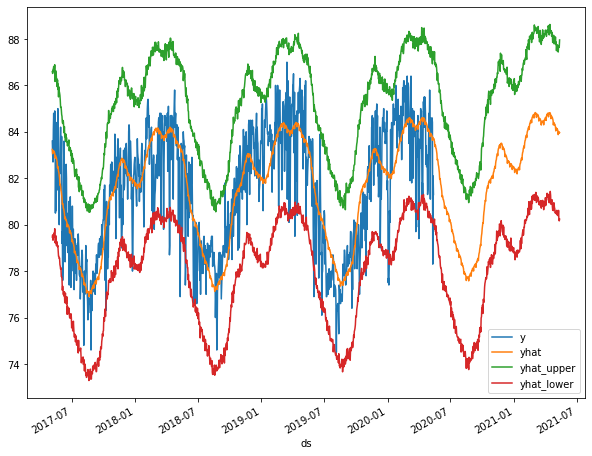

In [ ]:
final_df.query('city=="Abidjan"')[['y','yhat','yhat_upper','yhat_lower']][-1460:].plot()

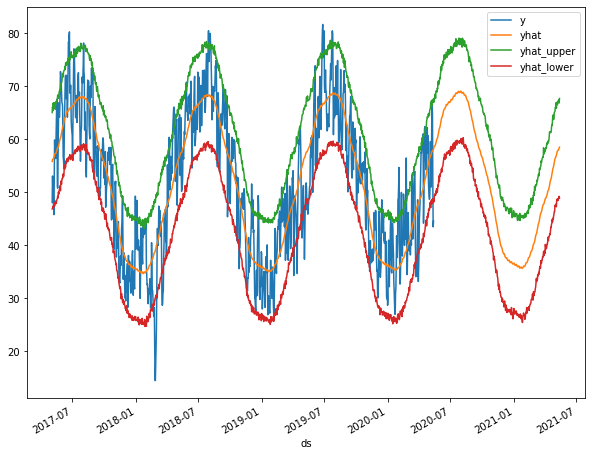

In [ ]:
final_df.query('city=="Zurich"')[['y','yhat','yhat_upper','yhat_lower']][-1460:].plot()